In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Import libraries 

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, label_binarize, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection,  tree, preprocessing, metrics, linear_model
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,  matthews_corrcoef
from imblearn.metrics import geometric_mean_score

In [4]:
sns.set_style('whitegrid')

In [6]:
#os.listdir('/kaggle/input')

## Dataset information

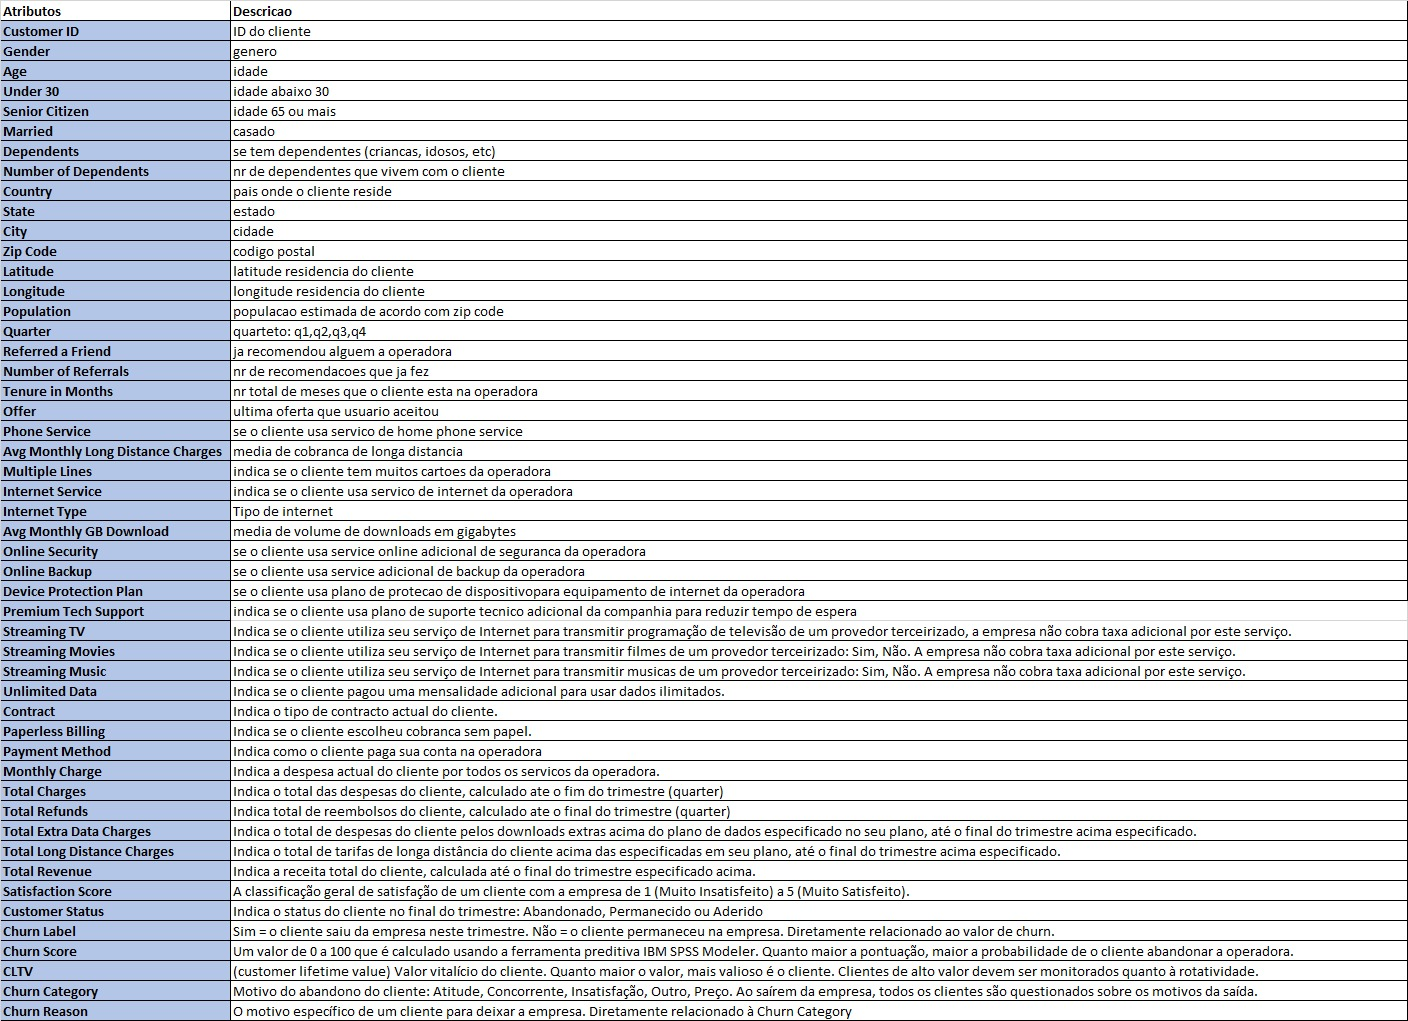

Nr of lines: 7043 
Nr of attributes: 50
In this supervised learning problem, I will be dealing with customer churn, which is a phenom that refers to loss of customers, because of dissatisfaction with products.

Goals of the project:
1. Analyze why customers are leaving the company, answering the business questions: 
* Which services tend to have high churn?
* What would we do to reduce churn?
* Strategies suggested to reduce churn in the future
2. Develop a ML Model to predict customer churn, with the target 'churn label';

## Import data

In [8]:
#telco_df=pd.read_csv('/kaggle/input/telco-customer-churn-11-1-3/telco.csv')
telco_df=pd.read_csv('./data/telco.csv')
telco_final_df=pd.DataFrame() #este dataset vai armazenar os dados ja preprocessados

In [9]:
telco_df #1st option to see the data

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,...,0,1639.44,3039.53,5,Stayed,No,45,5306,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,...,0,865.20,2807.47,3,Stayed,No,59,2140,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,...,0,2135.52,9453.04,4,Stayed,No,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,...,0,0.00,319.21,4,Stayed,No,59,2793,NaN,NaN


In [10]:
with pd.option_context('display.max_columns', None, 'display.width', 100):
    print(telco_df) #2nd option to see the data

     Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  Number of Dependents  \
0     8779-QRDMV    Male   78       No            Yes      No         No                     0   
1     7495-OOKFY  Female   74       No            Yes     Yes        Yes                     1   
2     1658-BYGOY    Male   71       No            Yes      No        Yes                     3   
3     4598-XLKNJ  Female   78       No            Yes     Yes        Yes                     1   
4     4846-WHAFZ  Female   80       No            Yes     Yes        Yes                     1   
...          ...     ...  ...      ...            ...     ...        ...                   ...   
7038  2569-WGERO  Female   30       No             No      No         No                     0   
7039  6840-RESVB    Male   38       No             No     Yes        Yes                     2   
7040  2234-XADUH  Female   30       No             No     Yes        Yes                     2   
7041  4801-JZAZL  Fe

In [11]:
display(telco_df.head(5).T) #3rd option to see the data

,0,1,2,3,4
Customer ID,8779-QRDMV,7495-OOKFY,1658-BYGOY,4598-XLKNJ,4846-WHAFZ
Gender,Male,Female,Male,Female,Female
Age,78,74,71,78,80
Under 30,No,No,No,No,No
Senior Citizen,Yes,Yes,Yes,Yes,Yes
Married,No,Yes,No,Yes,Yes
Dependents,No,Yes,Yes,Yes,Yes
Number of Dependents,0,1,3,1,1
Country,United States,United States,United States,United States,United States
State,California,California,California,California,California


## Pre-processing

Function to do the EDA (exploratory data analysis)

In [12]:
def telecom_func(data, column, count = True):
    print(f'Quantidade de valores unicos:   {data[column].nunique()}')
    print(f'\nQuais sao os valores unicos:  {data[column].unique()}')
    print(f'\nQuantidade de valores nulos:  {data[column].isnull().sum()}')
    
   # Verifica se a coluna é numérica
    if pd.api.types.is_numeric_dtype(data[column]):
        # Faz a contagem e ordena os valores numéricos, mantendo os NaN
        sorted_counts = data[column].value_counts(dropna=False).sort_index()
        print(f'\nQuantidade por opção (ordenada):\n{sorted_counts}')
    # Verifica se a coluna é categórica e ordenada
    elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:
        sorted_counts = data[column].value_counts(dropna=False).sort_index()
        print(f'\nQuantidade por opção (ordenada):\n{sorted_counts}')
    else:
        # Caso contrário, apenas mostra o value_counts sem ordenar
        print(f'\nQuantidade por opção:\n{data[column].value_counts(dropna=False)}')

        
    if count == True:
        sns.countplot(data = data, x = column, hue='Churn Label')
    else:
        sns.displot(data[column],kde = True)

## 1. Churn label

Quantidade de valores unicos:   2

Quais sao os valores unicos:  ['Yes' 'No']

Quantidade de valores nulos:  0

Quantidade por opção:
Churn Label
No     5174
Yes    1869
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_6320\3787506364.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


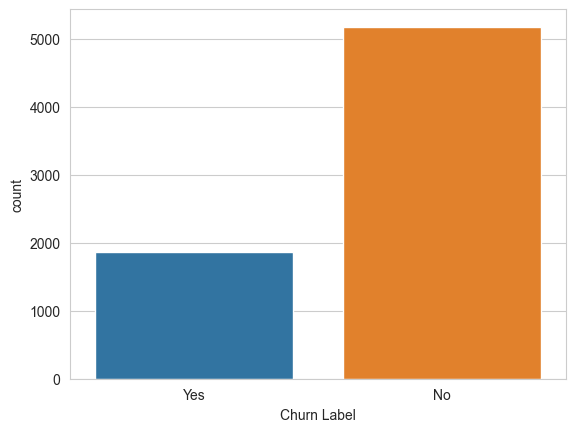

In [13]:
telecom_func(telco_df,'Churn Label')

Looking at the proportions, we can see that 73.46% of the data is labeled as "No" and the rest, corresponding to 26.54%, corresponds the label "Yes" (customers church).

In [14]:
#vamos substituir No-0 e Yes-1  na variavel alvo
telco_final_df['Churn Label']=telco_df['Churn Label']
telco_final_df['Churn Label']=telco_final_df['Churn Label'].replace(['No','Yes'],[0,1])

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_6320\2091925716.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_final_df['Churn Label']=telco_final_df['Churn Label'].replace(['No','Yes'],[0,1])


## 2. Customer ID

## 3. Gender

Quantidade de valores unicos:   2

Quais sao os valores unicos:  ['Male' 'Female']

Quantidade de valores nulos:  0

Quantidade por opção:
Gender
Male      3555
Female    3488
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_6320\3787506364.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


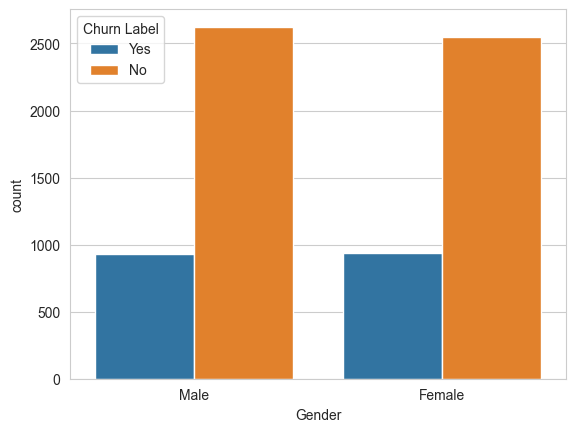

In [15]:
telecom_func(telco_df,'Gender')

In [16]:
#vamos substituir Male-0 e Female-1  
telco_final_df['Gender']=telco_df['Gender']
telco_final_df['Gender']=telco_final_df['Gender'].replace(['Male','Female'],[0,1])

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_6320\2611548322.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_final_df['Gender']=telco_final_df['Gender'].replace(['Male','Female'],[0,1])


In [17]:
telco_final_df

,Churn Label,Gender
0,1,0
1,1,1
2,1,0
3,1,1
4,1,1
...,...,...
7038,0,1
7039,0,0
7040,0,1
7041,0,1


## 4. Age

Quantidade de valores unicos:   62

Quais sao os valores unicos:  [78 74 71 80 72 76 66 70 77 65 67 68 69 79 75 73 37 19 31 23 38 21 29 61
 27 20 56 51 48 32 34 41 30 26 62 64 45 53 63 42 24 54 39 43 50 22 40 47
 60 52 55 59 49 58 25 28 33 44 57 46 36 35]

Quantidade de valores nulos:  0

Quantidade por opção (ordenada):
Age
19    127
20    127
21    140
22    130
23    146
     ... 
76     69
77     72
78     63
79     76
80     66
Name: count, Length: 62, dtype: int64


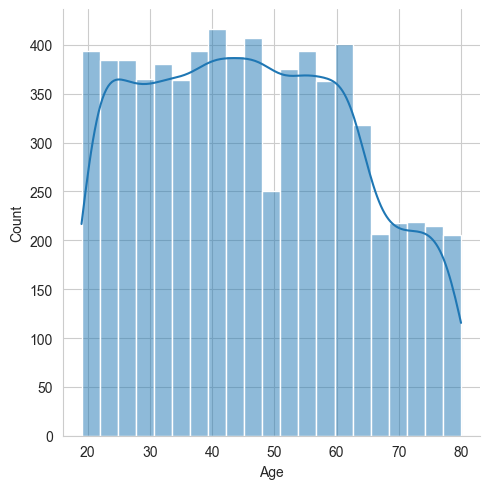

In [18]:
telecom_func(telco_df, 'Age', False)

In [19]:
#telco_final_df['Age']=telco_df['Age']

In [20]:
# a ideia que surgiu e de agrupar (intervalos) idade
telco_final_df['AgeGroup'] = pd.cut(telco_df['Age'],
                             bins=[18, 21, 31, 41, 51, 61, 71, 80], 
                             labels=['19-21','21-31', '31-41', '41-51', '51-61', '61-71','71-80'])

telco_final_df.head(2155)

,Churn Label,Gender,AgeGroup
0,1,0,71-80
1,1,1,71-80
2,1,0,61-71
3,1,1,71-80
4,1,1,71-80
...,...,...,...
2150,1,0,21-31
2151,1,1,61-71
2152,1,0,51-61
2153,1,0,51-61


In [21]:
#telco_final_df = telco_final_df.drop('Age', axis=1)

In [22]:
telco_final_df

,Churn Label,Gender,AgeGroup
0,1,0,71-80
1,1,1,71-80
2,1,0,61-71
3,1,1,71-80
4,1,1,71-80
...,...,...,...
7038,0,1,21-31
7039,0,0,31-41
7040,0,1,21-31
7041,0,1,31-41


## 4.1. Age Group 

Quantidade de valores unicos:   7

Quais sao os valores unicos:  ['71-80', '61-71', '31-41', '19-21', '21-31', '51-61', '41-51']
Categories (7, object): ['19-21' < '21-31' < '31-41' < '41-51' < '51-61' < '61-71' < '71-80']

Quantidade de valores nulos:  0

Quantidade por opção (ordenada):
AgeGroup
19-21     394
21-31    1254
31-41    1279
41-51    1330
51-61    1262
61-71     885
71-80     639
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_6320\3787506364.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


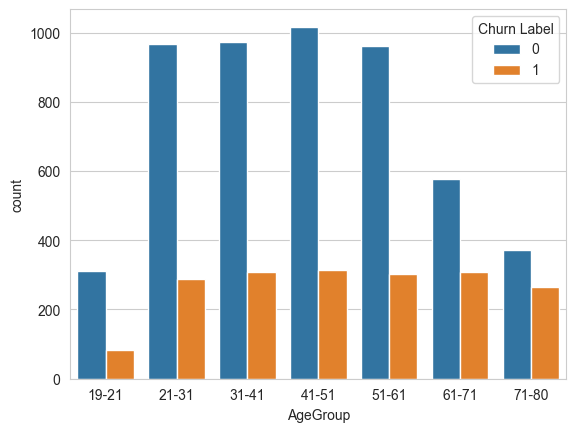

In [23]:
telecom_func(telco_final_df, 'AgeGroup')

## 5. Under 30

Quantidade de valores unicos:   2

Quais sao os valores unicos:  ['No' 'Yes']

Quantidade de valores nulos:  0

Quantidade por opção:
Under 30
No     5642
Yes    1401
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_6320\3787506364.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


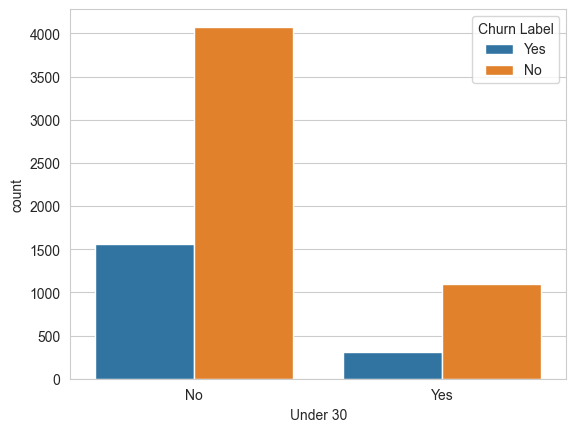

In [24]:
telecom_func(telco_df, 'Under 30')

In [25]:
# hipotese: desconfio que "under 30" seja irrelevante, vou confirmar mais a frente com confusion matrix 

#vamos substituir No-0 e Yes-1  
telco_final_df['Under 30']=telco_df['Under 30'].replace(['No','Yes'],[0,1])

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_6320\196873556.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_final_df['Under 30']=telco_df['Under 30'].replace(['No','Yes'],[0,1])


In [26]:
telco_final_df

,Churn Label,Gender,AgeGroup,Under 30
0,1,0,71-80,0
1,1,1,71-80,0
2,1,0,61-71,0
3,1,1,71-80,0
4,1,1,71-80,0
...,...,...,...,...
7038,0,1,21-31,0
7039,0,0,31-41,0
7040,0,1,21-31,0
7041,0,1,31-41,0


In [27]:
with pd.option_context('display.max_columns', None):
    print(telco_final_df[telco_final_df['Under 30'] == 1])

      Churn Label  Gender AgeGroup  Under 30
1143            1       1    19-21         1
1145            1       1    21-31         1
1147            1       1    19-21         1
1148            1       0    21-31         1
1150            1       0    21-31         1
...           ...     ...      ...       ...
7016            0       1    21-31         1
7017            0       1    21-31         1
7019            0       0    21-31         1
7026            0       1    21-31         1
7033            0       1    21-31         1

[1401 rows x 4 columns]


## 6. Senior Citizen

Quantidade de valores unicos:   2

Quais sao os valores unicos:  ['Yes' 'No']

Quantidade de valores nulos:  0

Quantidade por opção:
Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_6320\3787506364.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


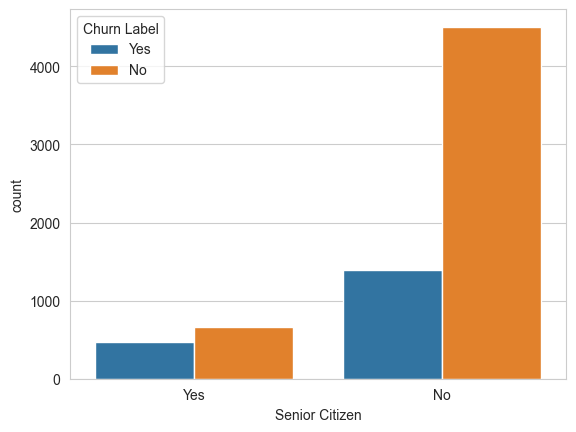

In [28]:
telecom_func(telco_df,'Senior Citizen')

In [29]:
#vamos substituir No-0 e Yes-1  
telco_final_df['Senior Citizen']=telco_df['Senior Citizen'].replace(['No','Yes'],[0,1])

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_6320\1545499505.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_final_df['Senior Citizen']=telco_df['Senior Citizen'].replace(['No','Yes'],[0,1])


### Analise : relacao entre age group, under 30, senior citizen

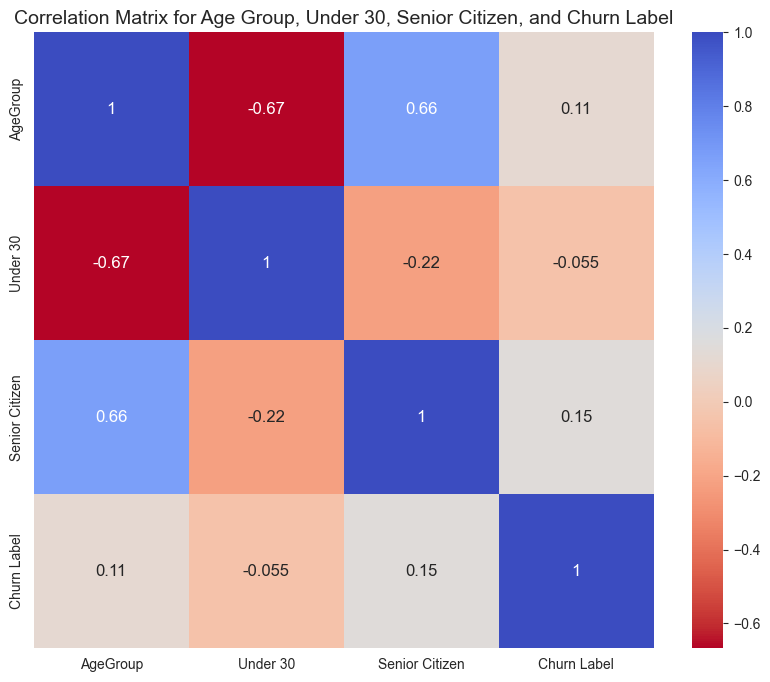

In [84]:
# Selecionar apenas as colunas de interesse
cols_of_interest = ['AgeGroup', 'Under 30', 'Senior Citizen', 'Churn Label']
corr = telco_final_df[cols_of_interest].corr()

# Configurar o gráfico
f, ax1 = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm_r', annot_kws={'size': 12}, ax=ax1)
ax1.set_title("Correlation Matrix for Age Group, Under 30, Senior Citizen, and Churn Label", fontsize=14)

plt.show()

## 7. Married

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_6320\3787506364.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


Quantidade de valores unicos:   2

Quais sao os valores unicos:  ['No' 'Yes']

Quantidade de valores nulos:  0

Quantidade por opção:
Married
No     3641
Yes    3402
Name: count, dtype: int64


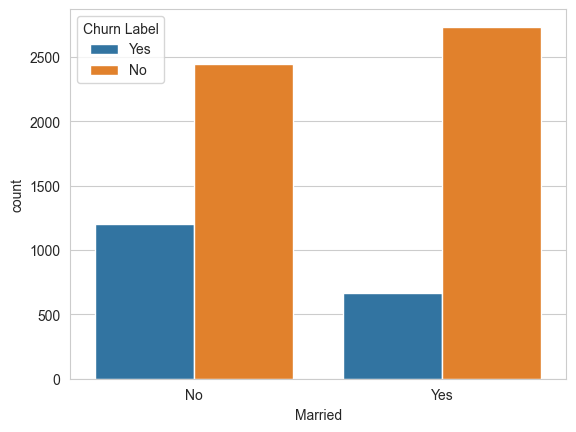

In [30]:
telecom_func(telco_df,'Married')

In [31]:
#vamos substituir No-0 e Yes-1  
telco_final_df['Married']=telco_df['Married'].replace(['No','Yes'],[0,1])

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_6320\3640062356.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_final_df['Married']=telco_df['Married'].replace(['No','Yes'],[0,1])


## 8. Dependents

Quantidade de valores unicos:   2

Quais sao os valores unicos:  ['No' 'Yes']

Quantidade de valores nulos:  0

Quantidade por opção:
Dependents
No     5416
Yes    1627
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_6320\3787506364.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


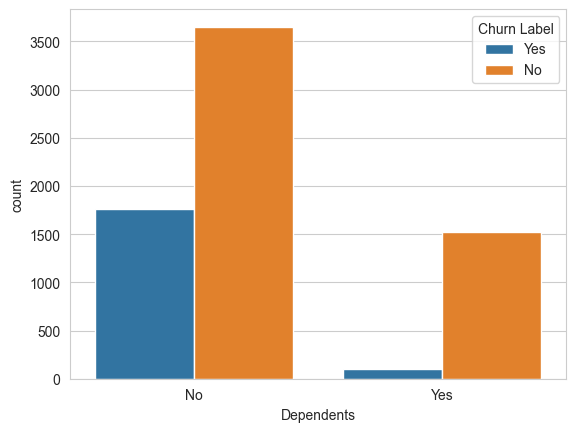

In [32]:
telecom_func(telco_df,'Dependents')

os que nao sao pais, sao os que (nao tem dependentes) mais abandonam a operadora.

In [33]:
#vamos substituir No-0 e Yes-1  
telco_final_df['Dependents']=telco_df['Dependents'].replace(['No','Yes'],[0,1])

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_6320\1666499611.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_final_df['Dependents']=telco_df['Dependents'].replace(['No','Yes'],[0,1])


## 9. Number of Dependents

Quantidade de valores unicos:   10

Quais sao os valores unicos:  [0 1 3 2 5 4 6 7 8 9]

Quantidade de valores nulos:  0

Quantidade por opção (ordenada):
Number of Dependents
0    5416
1     553
2     531
3     517
4       9
5      10
6       3
7       2
8       1
9       1
Name: count, dtype: int64


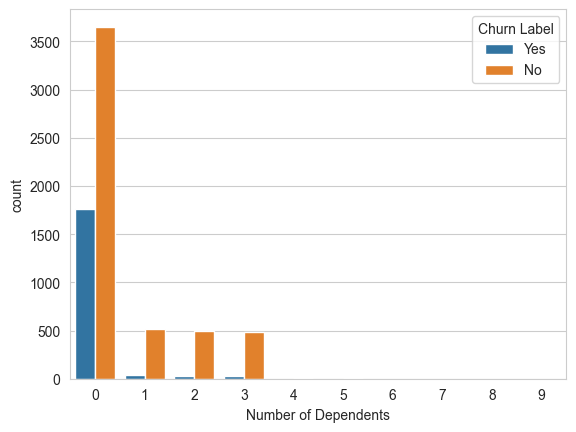

In [34]:
telecom_func(telco_df,'Number of Dependents')

de 4 dependentes ate 9 o numero e consideravelmente baixo, posso simplificar e agrupar para ser uma so categoria (tera 26 dados no total), e serao so 5 categorias no total

In [35]:
telco_final_df['Nr of Dependents'] = [ n if n <= 3 else 'MaisDe4' for n in telco_df['Number of Dependents']]

Quantidade de valores unicos:   5

Quais sao os valores unicos:  [0 1 3 2 'MaisDe4']

Quantidade de valores nulos:  0

Quantidade por opção:
Nr of Dependents
0          5416
1           553
2           531
3           517
MaisDe4      26
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_6320\3787506364.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


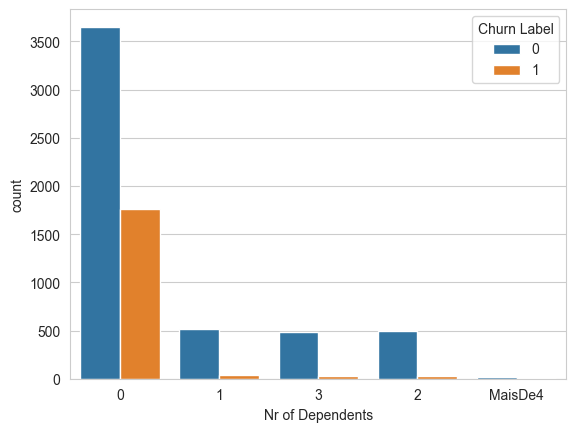

In [36]:
#Para confirmar que houve agrupamento de uma 5a categoria
telecom_func(telco_final_df,'Nr of Dependents')

In [37]:
telco_final_df

,Churn Label,Gender,AgeGroup,Under 30,Senior Citizen,Married,Dependents,Nr of Dependents
0,1,0,71-80,0,1,0,0,0
1,1,1,71-80,0,1,1,1,1
2,1,0,61-71,0,1,0,1,3
3,1,1,71-80,0,1,1,1,1
4,1,1,71-80,0,1,1,1,1
...,...,...,...,...,...,...,...,...
7038,0,1,21-31,0,0,0,0,0
7039,0,0,31-41,0,0,1,1,2
7040,0,1,21-31,0,0,1,1,2
7041,0,1,31-41,0,0,1,1,2


## 10. Country

Quantidade de valores unicos:   1

Quais sao os valores unicos:  ['United States']

Quantidade de valores nulos:  0

Quantidade por opção:
Country
United States    7043
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_6320\3787506364.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


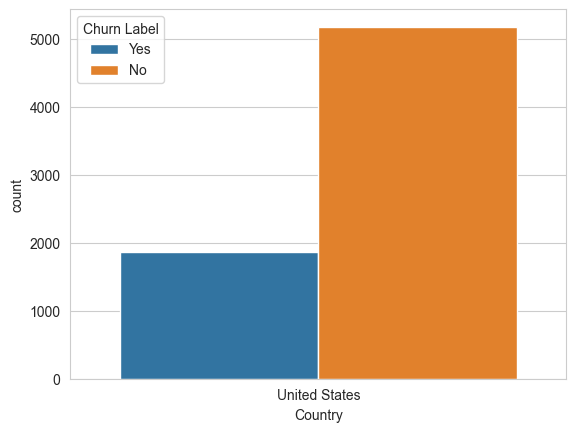

In [38]:
telecom_func(telco_df,'Country') 

Tenho a certeza que e irrelevante, porque so tem 1 categoria. Entao nao vai acrescentar nenhuma informacao nova ao modelo

## 11. State

Quantidade de valores unicos:   1

Quais sao os valores unicos:  ['California']

Quantidade de valores nulos:  0

Quantidade por opção:
State
California    7043
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_6320\3787506364.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


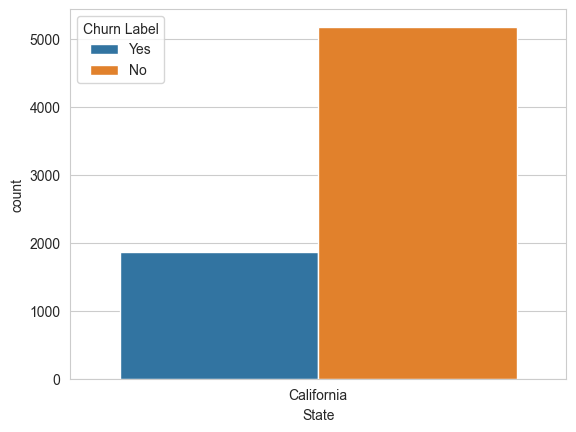

In [39]:
telecom_func(telco_df,'State')

## 12. City

Quantidade de valores unicos:   1106

Quais sao os valores unicos:  ['Los Angeles' 'Inglewood' 'Whittier' ... 'Topaz' 'Jacumba' 'Holtville']

Quantidade de valores nulos:  0

Quantidade por opção:
City
Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Jacumba               2
South Lake Tahoe      2
Johannesburg          2
Eldridge              2
Holtville             2
Name: count, Length: 1106, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_6320\3787506364.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


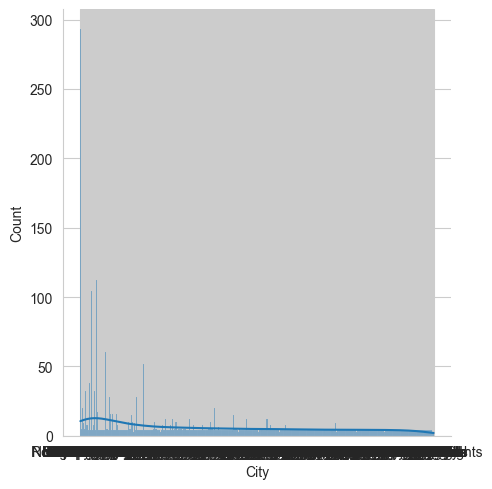

In [40]:
telecom_func(telco_df,'City', False)

Tem 1106 categorias, nao e muito pratico analisar assim. Mais a frente usa frequency encoding

In [41]:
print(telco_df['City'].value_counts(dropna=False).to_string())

City
Los Angeles               293
San Diego                 285
San Jose                  112
Sacramento                108
San Francisco             104
Fresno                     61
Long Beach                 60
Oakland                    52
Escondido                  51
Stockton                   44
Fallbrook                  43
Glendale                   40
Bakersfield                39
Temecula                   38
Riverside                  32
Berkeley                   32
Pasadena                   30
Whittier                   30
Irvine                     28
San Bernardino             28
Santa Barbara              28
Anaheim                    28
Modesto                    28
Inglewood                  25
Santa Monica               25
Burbank                    25
Torrance                   25
Santa Ana                  24
Santa Rosa                 24
Chula Vista                22
Van Nuys                   20
Corona                     20
Orange                     20
Garde

In [42]:
telco_final_df['City']=telco_df['City']

In [43]:
telco_final_df

,Churn Label,Gender,AgeGroup,Under 30,Senior Citizen,Married,Dependents,Nr of Dependents,City
0,1,0,71-80,0,1,0,0,0,Los Angeles
1,1,1,71-80,0,1,1,1,1,Los Angeles
2,1,0,61-71,0,1,0,1,3,Los Angeles
3,1,1,71-80,0,1,1,1,1,Inglewood
4,1,1,71-80,0,1,1,1,1,Whittier
...,...,...,...,...,...,...,...,...,...
7038,0,1,21-31,0,0,0,0,0,Landers
7039,0,0,31-41,0,0,1,1,2,Adelanto
7040,0,1,21-31,0,0,1,1,2,Amboy
7041,0,1,31-41,0,0,1,1,2,Angelus Oaks


In [44]:
#Tinha visto Johannesburg, mas afinal de contas na california tem esse lugar too 
for city in telco_df['City'].unique().tolist():
    print(city)

Los Angeles
Inglewood
Whittier
Pico Rivera
Los Alamitos
Sierra Madre
Pasadena
North Hollywood
Covina
El Monte
La Puente
Rowland Heights
Ontario
Alpine
San Diego
Thermal
Riverside
Hemet
Moreno Valley
Perris
Anaheim
Brea
Yorba Linda
Summerland
Santa Barbara
Alpaugh
Camp Nelson
Delano
Fellows
Temecula
Biola
Selma
Squaw Valley
Fresno
Jolon
San Francisco
Palo Alto
Birds Landing
Byron
Fremont
Livermore
Napa
Pleasanton
San Ramon
Berkeley
Greenbrae
Forest Knolls
Freedom
Gilroy
Los Gatos
San Jose
Glencoe
Columbia
Escondido
Lakewood
Fulton
Nice
Alderpoint
Bayside
Loleta
Rio Dell
Davis
Folsom
Madison
Pleasant Grove
Sheridan
Wheatland
Rancho Cordova
Canyon Dam
Dobbins
Forest Ranch
Grass Valley
Nevada City
Fallbrook
Lewiston
Palo Cedro
Round Mountain
Hermosa Beach
Buena Park
Long Beach
South Pasadena
Glendale
Reseda
Sylmar
Burbank
Chino
Claremont
Desert Center
Wrightwood
Murrieta
Nuevo
Irvine
Corona Del Mar
Midway City
Newport Beach
Santa Ana
Oak View
Terra Bella
Bradley
Nipomo
Lee Vining
Palmdale


## 12.1. New attribute: CityArea

Esse atributo resulta do mapeamento de city a area em que se localiza: urban e urbana, na california.

In [45]:
city_string = """
    
Los Angeles
Inglewood
Whittier
Pico Rivera
Los Alamitos
Sierra Madre
Pasadena
North Hollywood
Covina
El Monte
La Puente
Rowland Heights
Ontario
Alpine
San Diego
Thermal
Riverside
Hemet
Moreno Valley
Perris
Anaheim
Brea
Yorba Linda
Summerland
Santa Barbara
Alpaugh
Camp Nelson
Delano
Fellows
Temecula
Biola
Selma
Squaw Valley
Fresno
Jolon
San Francisco
Palo Alto
Birds Landing
Byron
Fremont
Livermore
Napa
Pleasanton
San Ramon
Berkeley
Greenbrae
Forest Knolls
Freedom
Gilroy
Los Gatos
San Jose
Glencoe
Columbia
Escondido
Lakewood
Fulton
Nice
Alderpoint
Bayside
Loleta
Rio Dell
Davis
Folsom
Madison
Pleasant Grove
Sheridan
Wheatland
Rancho Cordova
Canyon Dam
Dobbins
Forest Ranch
Grass Valley
Nevada City
Fallbrook
Lewiston
Palo Cedro
Round Mountain
Hermosa Beach
Buena Park
Long Beach
South Pasadena
Glendale
Reseda
Sylmar
Burbank
Chino
Claremont
Desert Center
Wrightwood
Murrieta
Nuevo
Irvine
Corona Del Mar
Midway City
Newport Beach
Santa Ana
Oak View
Terra Bella
Bradley
Nipomo
Lee Vining
Palmdale
Clovis
Cutler
Dunlap
Fowler
South Dos Palos
Tranquillity
Lockwood
Marina
San Lucas
Daly City
San Mateo
Concord
Hayward
El Sobrante
San Rafael
Novato
Stinson Beach
Moss Landing
Stockton
Angels Camp
Sheep Ranch
Ballico
Catheys Valley
Hickman
Soulsbyville
Branscomb
Philo
Point Arena
Westport
Gasquet
Piercy
Carmichael
Citrus Heights
Herald
Newcastle
Roseville
Applegate
Sacramento
Butte City
Clipper Mills
Quincy
Sutter
Twain
Adin
Paskenta
Red Bluff
Doyle
Sierra City
Tahoe Vista
Culver City
Gardena
Torrance
Montebello
Arcadia
Canoga Park
Stevenson Ranch
Castaic
Van Nuys
West Covina
Campo
Chula Vista
Spring Valley
Bonsall
Pala
Pauma Valley
Vista
Indian Wells
Desert Hot Springs
North Palm Springs
Crestline
Lucerne Valley
Redlands
Running Springs
Victorville
San Bernardino
Lake Elsinore
Camarillo
Somis
Coalinga
Ducor
Huron
Mc Kittrick
Visalia
Woody
Boron
Helm
Parlier
Half Moon Bay
Loma Mar
Atherton
Crockett
Fairfield
Pinole
Port Costa
Vallejo
Oakland
San Pablo
Corte Madera
Point Reyes Station
Boulder Creek
Morgan Hill
Murphys
Crows Landing
Merced
Modesto
Winton
Cobb
Mendocino
Blue Lake
Fair Oaks
Grizzly Flats
Guinda
Loomis
Pioneer
Soda Springs
Chico
Elk Creek
Grimes
Princeton
Williams
Yuba City
Anderson
Big Bend
Hat Creek
Shingletown
Weaverville
Downey
Huntington Park
Malibu
Pacific Palisades
San Pedro
Montrose
San Marino
Canyon Country
Azusa
Pomona
Rosemead
Yucaipa
San Jacinto
Dana Point
Lake Forest
Huntington Beach
Laguna Beach
Moorpark
Simi Valley
Avenal
Exeter
New Cuyama
San Luis Obispo
Los Alamos
Oceano
Pismo Beach
Big Pine
Johannesburg
Dinuba
Madera
Shaver Lake
Chualar
Portola Valley
Redwood City
Martinez
Moraga
Oakley
Emeryville
Richmond
Larkspur
Ben Lomond
Campbell
Davenport
Vallecito
Woodbridge
Delhi
Riverbank
Santa Rosa
Clearlake
Lakeport
Lucerne
The Sea Ranch
Bridgeville
Garberville
Auburn
Lotus
Mather
Sloughhouse
Brownsville
Forbestown
Redding
Shasta Lake
Hornbrook
Mineral
Trinity Center
Bellflower
Paramount
La Canada Flintridge
Pacoima
Valencia
Thousand Oaks
Sherman Oaks
Rancho Cucamonga
Glendora
San Gabriel
Alhambra
Mount Laguna
San Marcos
El Centro
Hawthorne
Redondo Beach
Santa Monica
Artesia
Sunset Beach
Baldwin Park
Chino Hills
Hacienda Heights
La Verne
Descanso
Pine Valley
Julian
La Jolla
Rancho Santa Fe
Warner Springs
San Ysidro
Cabazon
Calexico
Cathedral City
Morongo Valley
Palo Verde
Westmorland
White Water
Bloomington
Fontana
Mentone
Nipton
Pinon Hills
Shoshone
Yermo
Menifee
Winchester
Foothill Ranch
Fountain Valley
Oxnard
Buttonwillow
Pixley
Strathmore
Woodlake
Bakersfield
Creston
Los Olivos
Santa Ynez
Shandon
Benton
Bishop
O Neals
Los Altos
Millbrae
Montara
Pacifica
Bethel Island
El Cerrito
Travis Afb
Yountville
Penngrove
Brookdale
Castroville
Farmington
Hathaway Pines
Lodi
Wallace
El Nido
Hughson
Waterford
Albion
Dos Rios
Glen Ellen
Glenhaven
Kelseyville
Laytonville
Manchester
Redwood Valley
Elverta
Shingle Springs
Vacaville
Camino
Pollock Pines
Beale Afb
Camptonville
Colusa
Glenn
Greenville
Live Oak
Canby
Forks Of Salmon
Greenview
Junction City
Lookout
Macdoel
Madeline
Milford
Olympic Valley
Compton
La Mirada
Cerritos
Northridge
Sun Valley
Tarzana
Valley Village
Monterey Park
Borrego Springs
Indio
Brawley
Parker Dam
Twentynine Palms
Yucca Valley
Wildomar
Costa Mesa
Rancho Santa Margarita
Ladera Ranch
Tustin
Fullerton
Garden Grove
Orange
Placentia
Ojai
Port Hueneme
California Hot Springs
Ivanhoe
Lost Hills
Porterville
Stratford
Weldon
Avila Beach
Lompoc
San Miguel
California City
Acton
Bridgeport
Ahwahnee
Big Creek
Friant
Kingsburg
Lakeshore
Sultana
Salinas
Menlo Park
South San Francisco
Castro Valley
Pittsburg
Rio Vista
Dillon Beach
Nicasio
San Quentin
Felton
French Camp
Cressey
La Grange
Midpines
Mi Wuk Village
Turlock
Twain Harte
Cazadero
Elk
Ferndale
Miranda
Somes Bar
Capay
Courtland
Dixon
Elmira
Jackson
Lincoln
Berry Creek
Penn Valley
Hamilton City
Meadow Valley
Flournoy
Los Molinos
Seiad Valley
Shasta
Beverly Hills
Wilmington
Carson
Sunland
West Hills
Santa Clarita
Westlake Village
South El Monte
Upland
Potrero
Tecate
Carlsbad
El Cajon
Lakeside
Palomar Mountain
Ramona
Santee
Valley Center
Palm Desert
Adelanto
Daggett
Aguanga
Norco
Corona
Armona
Earlimart
Kettleman City
Posey
Springville
Cambria
Caliente
Olancha
Randsburg
Prather
Raisin City
Carmel
Burlingame
Mountain View
San Gregorio
Newark
Saint Helena
San Leandro
Petaluma
San Martin
Scotts Valley
Denair
Hilmar
Long Barn
Patterson
Snelling
Healdsburg
Occidental
Yorkville
Honeydew
Hydesville
Klamath
Redway
Salyer
Greenwood
Isleton
Knights Landing
Pilot Hill
Pine Grove
Rio Linda
Twin Bridges
Granite Bay
Challenge
Dunnigan
North San Juan
Palermo
Willows
Burney
Corning
Dorris
Igo
Montgomery Creek
Mount Shasta
Vina
Likely
Portola
Ravendale
Standish
Tahoe City
South Gate
Agoura Hills
Newhall
La Mesa
Lemon Grove
National City
Del Mar
Ranchita
Santa Ysabel
Pioneertown
Helendale
Lytle Creek
Oro Grande
San Clemente
Laguna Niguel
Ventura
Frazier Park
Lamont
Lindsay
Atascadero
Santa Maria
Edwards
Keeler
Lancaster
Tehachapi
Bass Lake
Cantua Creek
Caruthers
Chowchilla
Del Rey
Five Points
Kerman
Monterey
Alameda
Alamo
Orinda
Cotati
Aromas
Santa Cruz
Saratoga
Copperopolis
Big Oak Flat
Coulterville
El Portal
Gustine
Le Grand
Newman
Ripon
Salida
Middletown
Witter Springs
Fields Landing
Redcrest
Somerset
Woodland
Durham
Paradise
Hyampom
Klamath River
Lakehead
Davis Creek
Tahoma
Granada Hills
Encino
Studio City
Earp
Thousand Palms
Lynwood
Marina Del Rey
La Habra
Avalon
Harbor City
Altadena
Monrovia
Tujunga
Mission Hills
San Dimas
Seeley
Ludlow
Phelan
Rialto
March Air Reserve Base
Homeland
Idyllwild
Sun City
Bodfish
Kernville
Lemon Cove
Shafter
Keene
Pearblossom
Miramonte
Orosi
San Joaquin
Tollhouse
King City
Pebble Beach
Belmont
Pescadero
San Bruno
Sunnyvale
Antioch
San Lorenzo
Union City
Walnut Creek
Albany
Bodega Bay
Marshall
San Anselmo
Sausalito
Tomales
Valley Ford
Alviso
Acampo
Linden
Valley Springs
West Point
Atwater
Mariposa
Oakdale
Caspar
Cloverdale
Comptche
Gualala
Rio Nido
Ukiah
Mckinleyville
Korbel
Smith River
Trinidad
Amador City
Diamond Springs
Elk Grove
Orangevale
Penryn
Plymouth
Winters
Colfax
Meadow Vista
Antelope
Arbuckle
Bangor
Magalia
Oroville
Strawberry Valley
Callahan
Cottonwood
Douglas City
Fall River Mills
Nubieber
La Palma
Stanton
Lomita
Seal Beach
Porter Ranch
Walnut
Coronado
Banning
Heber
La Quinta
Rancho Mirage
Amboy
Angelus Oaks
Apple Valley
Baker
Cedar Glen
Colton
Fawnskin
Sugarloaf
Anza
Newport Coast
Trabuco Canyon
Piru
Santa Paula
Taft
Los Osos
Buellton
Morro Bay
Templeton
Independence
Rosamond
Hume
North Fork
Oakhurst
Traver
Carmel Valley
Brisbane
Pleasant Hill
Danville
Pope Valley
Dublin
Rodeo
Deer Park
Sunol
Inverness
Mill Valley
San Juan Bautista
Santa Clara
Avery
Mountain Ranch
Planada
Clearlake Oaks
Covelo
Eldridge
Guerneville
Jenner
Eureka
West Sacramento
Brooks
El Dorado
Garden Valley
Nicolaus
Rio Oso
Thornton
Dutch Flat
Echo Lake
Weimar
Downieville
Rough And Ready
Bieber
Oak Run
Old Station
Whitmore
Blairsden Graeagle
Eagleville
Fort Bidwell
Sierraville
Westwood
South Lake Tahoe
Lawndale
Santa Fe Springs
Chatsworth
Mira Loma
Bonita
Guatay
Oceanside
Palm Springs
Big Bear City
Calimesa
Green Valley Lake
Hinkley
Silverado
Carpinteria
Lemoore
Sequoia National Park
Wasco
Casmalia
Guadalupe
Lake Hughes
Valyermo
Sanger
Pacific Grove
Seaside
Calistoga
Lafayette
Bolinas
Capitola
Cupertino
Milpitas
Arnold
Campo Seco
Clements
Lockeford
Lathrop
Pinecrest
Stevinson
Vernalis
Sonoma
Hoopa
Myers Flat
Samoa
Zenia
Clarksburg
Galt
Hood
Walnut Grove
Emigrant Gap
Browns Valley
Crescent Mills
Maxwell
Olivehurst
Bella Vista
Castella
Happy Camp
Paynes Creek
Susanville
Termo
Carnelian Bay
Kings Beach
El Segundo
Topanga
Venice
Duarte
Woodland Hills
Capistrano Beach
Mission Viejo
Corcoran
Farmersville
Lebec
Richgrove
Tulare
Solvang
Mojave
Badger
Riverdale
Carmel By The Sea
Greenfield
Angwin
Clayton
Rohnert Park
Olema
Woodacre
Aptos
Watsonville
Groveland
Jamestown
Livingston
Tuolumne
Annapolis
Graton
Hopland
Navarro
Burnt Ranch
Petrolia
Cool
Kirkwood
Rescue
Sutter Creek
Wilton
Kyburz
Gridley
Orland
Taylorsville
Cassel
Dunsmuir
Etna
Mcarthur
Mill Creek
Platina
Wendel
Homewood
West Hollywood
Hawaiian Gardens
Winnetka
San Fernando
North Hills
Montclair
Imperial Beach
Encinitas
Poway
Solana Beach
Beaumont
Calipatria
Imperial
Ocotillo
Bell
Manhattan Beach
Maywood
Palos Verdes Peninsula
Rancho Palos Verdes
Playa Del Rey
Cypress
Norwalk
Surfside
La Crescenta
Calabasas
Newbury Park
Oak Park
Mt Baldy
Diamond Bar
Temple City
Dulzura
Jamul
Cardiff By The Sea
Blythe
Coachella
Joshua Tree
Mecca
Salton City
Winterhaven
Landers
Fort Irwin
Barstow
Grand Terrace
Big Bear Lake
Death Valley
Essex
Forest Falls
Hesperia
Highland
Lake Arrowhead
Loma Linda
Needles
Mountain Center
Laguna Hills
Aliso Viejo
San Juan Capistrano
Westminster
Villa Park
Fillmore
Goleta
Arvin
Glennville
Hanford
Lake Isabella
Laton
Mc Farland
Three Rivers
Tupman
Arroyo Grande
Cayucos
Grover Beach
Paso Robles
San Ardo
San Simeon
Santa Margarita
Darwin
June Lake
Littlerock
Llano
Mammoth Lakes
Auberry
Coarsegold
Dos Palos
Firebaugh
Fish Camp
Los Banos
Orange Cove
Raymond
Reedley
Wishon
Gonzales
Soledad
Spreckels
La Honda
Moss Beach
San Carlos
Stanford
Benicia
Brentwood
Hercules
Suisun City
Belvedere Tiburon
Bodega
Fairfax
Lagunitas
San Geronimo
Mount Hermon
Paicines
Soquel
Mount Hamilton
Burson
Mokelumne Hill
San Andreas
Wilseyville
Ceres
Escalon
Hornitos
Keyes
Manteca
Sonora
Tracy
Boonville
Duncans Mills
Forestville
Fort Bragg
Geyserville
Kenwood
Little River
Lower Lake
Monte Rio
Potter Valley
Sebastopol
Upper Lake
Willits
Windsor
Blocksburg
Arcata
Carlotta
Fortuna
Kneeland
Mad River
Orick
Orleans
Phillipsville
Scotia
Weott
Willow Creek
Leggett
Esparto
Fiddletown
Foresthill
Georgetown
Ione
North Highlands
Placerville
River Pines
Rocklin
Volcano
Alta
Gold Run
El Dorado Hills
Marysville
Alleghany
Biggs
Goodyears Bar
Meridian
Oregon House
Richvale
Smartville
Stirling City
Stonyford
Washington
Big Bar
Chester
French Gulch
Gazelle
Gerber
Grenada
Mccloud
Manton
Millville
Scott Bar
Tehama
Weed
Yreka
Cedarville
Chilcoot
Clio
Coleville
Herlong
Janesville
Litchfield
Loyalton
Markleeville
Calpine
Tulelake
Boulevard
Niland
Wofford Heights
Alturas
Topaz
Jacumba
Holtville
""" 

# string em lista
city_list = [city_list.strip() for city_list in city_string.split('\n') if city_list.strip()]

# Formatar as localidades no formato desejado com aspas simples
city_format = [f"'{city}': ' '," for city in city_list] 

# Ver resultado
for item in city_format:
    print(item)

'Los Angeles': ' ',
'Inglewood': ' ',
'Whittier': ' ',
'Pico Rivera': ' ',
'Los Alamitos': ' ',
'Sierra Madre': ' ',
'Pasadena': ' ',
'North Hollywood': ' ',
'Covina': ' ',
'El Monte': ' ',
'La Puente': ' ',
'Rowland Heights': ' ',
'Ontario': ' ',
'Alpine': ' ',
'San Diego': ' ',
'Thermal': ' ',
'Riverside': ' ',
'Hemet': ' ',
'Moreno Valley': ' ',
'Perris': ' ',
'Anaheim': ' ',
'Brea': ' ',
'Yorba Linda': ' ',
'Summerland': ' ',
'Santa Barbara': ' ',
'Alpaugh': ' ',
'Camp Nelson': ' ',
'Delano': ' ',
'Fellows': ' ',
'Temecula': ' ',
'Biola': ' ',
'Selma': ' ',
'Squaw Valley': ' ',
'Fresno': ' ',
'Jolon': ' ',
'San Francisco': ' ',
'Palo Alto': ' ',
'Birds Landing': ' ',
'Byron': ' ',
'Fremont': ' ',
'Livermore': ' ',
'Napa': ' ',
'Pleasanton': ' ',
'San Ramon': ' ',
'Berkeley': ' ',
'Greenbrae': ' ',
'Forest Knolls': ' ',
'Freedom': ' ',
'Gilroy': ' ',
'Los Gatos': ' ',
'San Jose': ' ',
'Glencoe': ' ',
'Columbia': ' ',
'Escondido': ' ',
'Lakewood': ' ',
'Fulton': ' ',
'Nice': ' ',
'Al

In [46]:
#Agora ja posso mapear

city_groups={ 
    'Los Angeles': 'urban',
    'Inglewood': 'urban',
    'Whittier': 'urban',
    'Pico Rivera': 'urban',
    'Los Alamitos': 'urban',
    'Sierra Madre': 'urban',
    'Pasadena': 'urban',
    'North Hollywood': 'urban',
    'Covina': 'urban',
    'El Monte': 'urban',
    'La Puente': 'urban',
    'Rowland Heights': 'urban',
    'Ontario': 'urban',
    'Alpine': 'rural',
    'San Diego': 'urban',
    'Thermal': 'rural',
    'Riverside': 'urban',
    'Hemet': 'urban',
    'Moreno Valley': 'urban',
    'Perris': 'urban',
    'Anaheim': 'urban',
    'Brea': 'urban',
    'Yorba Linda': 'urban',
    'Summerland': 'rural',
    'Santa Barbara': 'urban',
    'Alpaugh': 'rural',
    'Camp Nelson': 'rural',
    'Delano': 'urban',
    'Fellows': 'rural',
    'Temecula': 'urban',
    'Biola': 'rural',
    'Selma': 'urban',
    'Squaw Valley': 'rural',
    'Fresno': 'urban',
    'Jolon': 'rural',
    'San Francisco': 'urban',
    'Palo Alto': 'urban',
    'Birds Landing': 'rural',
    'Byron': 'rural',
    'Fremont': 'urban',
    'Livermore': 'urban',
    'Napa': 'urban',
    'Pleasanton': 'urban',
    'San Ramon': 'urban',
    'Berkeley': 'urban',
    'Greenbrae': 'urban',
    'Forest Knolls': 'rural',
    'Freedom': 'rural',
    'Gilroy': 'urban',
    'Los Gatos': 'urban',
    'San Jose': 'urban',
    'Glencoe': 'rural',
    'Columbia': 'rural',
    'Escondido': 'urban',
    'Lakewood': 'urban',
    'Fulton': 'rural',
    'Nice': 'rural',
    'Alderpoint': 'rural',
    'Bayside': 'rural',
    'Loleta': 'rural',
    'Rio Dell': 'rural',
    'Davis': 'urban',
    'Folsom': 'urban',
    'Madison': 'rural',
    'Pleasant Grove': 'rural',
    'Sheridan': 'rural',
    'Wheatland': 'rural',
    'Rancho Cordova': 'urban',
    'Canyon Dam': 'rural',
    'Dobbins': 'rural',
    'Forest Ranch': 'rural',
    'Grass Valley': 'urban',
    'Nevada City': 'urban',
    'Fallbrook': 'urban',
    'Lewiston': 'rural',
    'Palo Cedro': 'rural',
    'Round Mountain': 'rural',
    'Hermosa Beach': 'urban',
    'Buena Park': 'urban',
    'Long Beach': 'urban',
    'South Pasadena': 'urban',
    'Glendale': 'urban',
    'Reseda': 'urban',
    'Sylmar': 'urban',
    'Burbank': 'urban',
    'Chino': 'urban',
    'Claremont': 'urban',
    'Desert Center': 'rural',
    'Wrightwood': 'rural',
    'Murrieta': 'urban',
    'Nuevo': 'rural',
    'Irvine': 'urban',
    'Corona Del Mar': 'urban',
    'Midway City': 'urban',
    'Newport Beach': 'urban',
    'Santa Ana': 'urban',
    'Oak View': 'rural',
    'Terra Bella': 'rural',
    'Bradley': 'rural',
    'Nipomo': 'rural',
    'Lee Vining': 'rural',
    'Palmdale': 'urban',
    'Clovis': 'urban',
    'Cutler': 'rural',
    'Dunlap': 'rural',
    'Fowler': 'urban',
    'South Dos Palos': 'rural',
    'Tranquillity': 'rural',
    'Lockwood': 'rural',
    'Marina': 'urban',
    'San Lucas': 'rural',
    'Daly City': 'urban',
    'San Mateo': 'urban',
    'Concord': 'urban',
    'Hayward': 'urban',
    'El Sobrante': 'urban',
    'San Rafael': 'urban',
    'Novato': 'urban',
    'Stinson Beach': 'rural',
    'Moss Landing': 'rural',
    'Stockton': 'urban',
    'Angels Camp': 'rural',
    'Sheep Ranch': 'rural',
    'Ballico': 'rural',
    'Catheys Valley': 'rural',
    'Hickman': 'rural',
    'Soulsbyville': 'rural',
    'Branscomb': 'rural',
    'Philo': 'rural',
    'Point Arena': 'rural',
    'Westport': 'rural',
    'Gasquet': 'rural',
    'Piercy': 'rural',
    'Carmichael': 'urban',
    'Citrus Heights': 'urban',
    'Herald': 'rural',
    'Newcastle': 'rural',
    'Roseville': 'urban',
    'Applegate': 'rural',
    'Sacramento': 'urban',
    'Butte City': 'rural',
    'Clipper Mills': 'rural',
    'Quincy': 'rural',
    'Sutter': 'rural',
    'Twain': 'rural',
    'Adin': 'rural',
    'Paskenta': 'rural',
    'Red Bluff': 'rural',
    'Doyle': 'rural',
    'Sierra City': 'rural',
    'Tahoe Vista': 'rural',
    'Culver City': 'urban',
    'Gardena': 'urban',
    'Torrance': 'urban',
    'Montebello': 'urban',
    'Arcadia': 'urban',
    'Canoga Park': 'urban',
    'Stevenson Ranch': 'urban',
    'Castaic': 'urban',
    'Van Nuys': 'urban',
    'West Covina': 'urban',
    'Campo': 'rural',
    'Chula Vista': 'urban',
    'Spring Valley': 'urban',
    'Bonsall': 'rural',
    'Pala': 'rural',
    'Pauma Valley': 'rural',
    'Vista': 'urban',
    'Indian Wells': 'urban',
    'Desert Hot Springs': 'urban',
    'North Palm Springs': 'rural',
    'Crestline': 'rural',
    'Lucerne Valley': 'rural',
    'Redlands': 'urban',
    'Running Springs': 'rural',
    'Victorville': 'urban',
    'San Bernardino': 'urban',
    'Lake Elsinore': 'urban',
    'Camarillo': 'urban',
    'Somis': 'rural',
    'Coalinga': 'rural',
    'Ducor': 'rural',
    'Huron': 'rural',
    'Mc Kittrick': 'rural',
    'Visalia': 'urban',
    'Woody': 'rural',
    'Boron': 'rural',
    'Helm': 'rural',
    'Parlier': 'urban',
    'Half Moon Bay': 'urban',
    'Loma Mar': 'rural',
    'Atherton': 'urban',
    'Crockett': 'urban',
    'Fairfield': 'urban',
    'Pinole': 'urban',
    'Port Costa': 'rural',
    'Vallejo': 'urban',
    'Oakland': 'urban',
    'San Pablo': 'urban',
    'Corte Madera': 'urban',
    'Point Reyes Station': 'rural',
    'Boulder Creek': 'rural',
    'Morgan Hill': 'urban',
    'Murphys': 'rural',
    'Crows Landing': 'rural',
    'Merced': 'urban',
    'Modesto': 'urban',
    'Winton': 'rural',
    'Cobb': 'rural',
    'Mendocino': 'rural',
    'Blue Lake': 'rural',
    'Fair Oaks': 'urban',
    'Grizzly Flats': 'rural',
    'Guinda': 'rural',
    'Loomis': 'urban',
    'Pioneer': 'rural',
    'Soda Springs': 'rural',
    'Chico': 'urban',
    'Elk Creek': 'rural',
    'Grimes': 'rural',
    'Princeton': 'rural',
    'Williams': 'rural',
    'Yuba City': 'urban',
    'Anderson': 'urban',
    'Big Bend': 'rural',
    'Hat Creek': 'rural',
    'Shingletown': 'rural',
    'Weaverville': 'rural',
    'Downey': 'urban',
    'Huntington Park': 'urban',
    'Malibu': 'urban',
    'Pacific Palisades': 'urban',
    'San Pedro': 'urban',
    'Montrose': 'urban',
    'San Marino': 'urban',
    'Canyon Country': 'urban',
    'Azusa': 'urban',
    'Pomona': 'urban',
    'Rosemead': 'urban',
    'Yucaipa': 'rural',
    'San Jacinto': 'rural',
    'Dana Point': 'urban',
    'Lake Forest': 'urban',
    'Huntington Beach': 'urban',
    'Laguna Beach': 'urban',
    'Moorpark': 'urban',
    'Simi Valley': 'urban',
    'Avenal': 'rural',
    'Exeter': 'rural',
    'New Cuyama': 'rural',
    'San Luis Obispo': 'urban',
    'Los Alamos': 'rural',
    'Oceano': 'rural',
    'Pismo Beach': 'urban',
    'Big Pine': 'rural',
    'Johannesburg': 'rural',
    'Dinuba': 'urban',
    'Madera': 'urban',
    'Shaver Lake': 'rural',
    'Chualar': 'rural',
    'Portola Valley': 'urban',
    'Redwood City': 'urban',
    'Martinez': 'urban',
    'Moraga': 'urban',
    'Oakley': 'urban',
    'Emeryville': 'urban',
    'Richmond': 'urban',
    'Larkspur': 'urban',
    'Ben Lomond': 'rural',
    'Campbell': 'urban',
    'Davenport': 'rural',
    'Vallecito': 'rural',
    'Woodbridge': 'urban',
    'Delhi': 'rural',
    'Riverbank': 'urban',
    'Santa Rosa': 'urban',
    'Clearlake': 'rural',
    'Lakeport': 'rural',
    'Lucerne': 'rural',
    'The Sea Ranch': 'rural',
    'Bridgeville': 'rural',
    'Garberville': 'rural',
    'Auburn': 'urban',
    'Lotus': 'rural',
    'Mather': 'rural',
    'Sloughhouse': 'rural',
    'Brownsville': 'rural',
    'Forbestown': 'rural',
    'Redding': 'urban',
    'Shasta Lake': 'urban',
    'Hornbrook': 'rural',
    'Mineral': 'rural',
    'Trinity Center': 'rural',
    'Bellflower': 'urban',
    'Paramount': 'urban',
    'La Canada Flintridge': 'urban',
    'Pacoima': 'urban',
    'Valencia': 'urban',
    'Thousand Oaks': 'urban',
    'Sherman Oaks': 'urban',
    'Rancho Cucamonga': 'urban',
    'Glendora': 'urban',
    'San Gabriel': 'urban',
    'Alhambra': 'urban',
    'Mount Laguna': 'rural',
    'San Marcos': 'urban',
    'El Centro': 'urban',
    'Hawthorne': 'urban',
    'Redondo Beach': 'urban',
    'Santa Monica': 'urban',
    'Artesia': 'urban',
    'Sunset Beach': 'urban',
    'Baldwin Park': 'urban',
    'Chino Hills': 'urban',
    'Hacienda Heights': 'urban',
    'La Verne': 'urban',
    'Descanso': 'rural',
    'Pine Valley': 'rural',
    'Julian': 'rural',
    'La Jolla': 'urban',
    'Rancho Santa Fe': 'urban',
    'Warner Springs': 'rural',
    'San Ysidro': 'urban',
    'Cabazon': 'rural',
    'Calexico': 'urban',
    'Cathedral City': 'urban',
    'Morongo Valley': 'rural',
    'Palo Verde': 'rural',
    'Westmorland': 'rural',
    'White Water': 'rural',
    'Bloomington': 'urban',
    'Fontana': 'urban',
    'Mentone': 'rural',
    'Nipton': 'rural',
    'Pinon Hills': 'rural',
    'Shoshone': 'rural',
    'Yermo': 'rural',
    'Menifee': 'urban',
    'Winchester': 'rural',
    'Foothill Ranch': 'urban',
    'Fountain Valley': 'urban',
    'Oxnard': 'urban',
    'Buttonwillow': 'rural',
    'Pixley': 'rural',
    'Strathmore': 'rural',
    'Woodlake': 'rural',
    'Bakersfield': 'urban',
    'Creston': 'rural',
    'Los Olivos': 'rural',
    'Santa Ynez': 'rural',
    'Shandon': 'rural',
    'Benton': 'rural',
    'Bishop': 'urban',
    'O Neals': 'rural',
    'Los Altos': 'urban',
    'Millbrae': 'urban',
    'Montara': 'rural',
    'Pacifica': 'urban',
    'Bethel Island': 'rural',
    'El Cerrito': 'urban',
    'Travis Afb': 'urban',
    'Yountville': 'rural',
    'Penngrove': 'rural',
    'Brookdale': 'rural',
    'Castroville': 'urban',
    'Farmington': 'rural',
    'Hathaway Pines': 'rural',
    'Lodi': 'urban',
    'Wallace': 'rural',
    'El Nido': 'rural',
    'Hughson': 'urban',
    'Waterford': 'rural',
    'Albion': 'rural',
    'Dos Rios': 'rural',
    'Glen Ellen': 'rural',
    'Glenhaven': 'rural',
    'Kelseyville': 'rural',
    'Laytonville': 'rural',
    'Manchester': 'rural',
    'Redwood Valley': 'rural',
    'Elverta': 'rural',
    'Shingle Springs': 'urban',
    'Vacaville': 'urban',
    'Camino': 'rural',
    'Pollock Pines': 'rural',
    'Beale Afb': 'urban',
    'Camptonville': 'rural',
    'Colusa': 'rural',
    'Glenn': 'rural',
    'Greenville': 'rural',
    'Live Oak': 'rural',
    'Canby': 'rural',
    'Forks Of Salmon': 'rural',
    'Greenview': 'rural',
    'Junction City': 'rural',
    'Lookout': 'rural',
    'Macdoel': 'rural',
    'Madeline': 'rural',
    'Milford': 'rural',
    'Olympic Valley': 'rural',
    'Compton': 'urban',
    'La Mirada': 'urban',
    'Cerritos': 'urban',
    'Northridge': 'urban',
    'Sun Valley': 'urban',
    'Tarzana': 'urban',
    'Valley Village': 'urban',
    'Monterey Park': 'urban',
    'Borrego Springs': 'rural',
    'Indio': 'urban',
    'Brawley': 'urban',
    'Parker Dam': 'rural',
    'Twentynine Palms': 'rural',
    'Yucca Valley': 'rural',
    'Wildomar': 'urban',
    'Costa Mesa': 'urban',
    'Rancho Santa Margarita': 'urban',
    'Ladera Ranch': 'urban',
    'Tustin': 'urban',
    'Fullerton': 'urban',
    'Garden Grove': 'urban',
    'Orange': 'urban',
    'Placentia': 'urban',
    'Ojai': 'rural',
    'Port Hueneme': 'urban',
    'California Hot Springs': 'rural',
    'Ivanhoe': 'rural',
    'Lost Hills': 'rural',
    'Porterville': 'urban',
    'Stratford': 'rural',
    'Weldon': 'rural',
    'Avila Beach': 'rural',
    'Lompoc': 'urban',
    'San Miguel': 'rural',
    'California City': 'urban',
    'Acton': 'rural',
    'Bridgeport': 'rural',
    'Ahwahnee': 'rural',
    'Big Creek': 'rural',
    'Friant': 'rural',
    'Kingsburg': 'urban',
    'Lakeshore': 'rural',
    'Sultana': 'rural',
    'Salinas': 'urban',
    'Menlo Park': 'urban',
    'South San Francisco': 'urban',
    'Castro Valley': 'urban',
    'Pittsburg': 'urban',
    'Rio Vista': 'urban',
    'Dillon Beach': 'rural',
    'Nicasio': 'rural',
    'San Quentin': 'rural',
    'Felton': 'urban',
    'French Camp': 'rural',
    'Cressey': 'rural',
    'La Grange': 'rural',
    'Midpines': 'rural',
    'Mi Wuk Village': 'rural',
    'Turlock': 'urban',
    'Twain Harte': 'rural',
    'Cazadero': 'rural',
    'Elk': 'rural',
    'Ferndale': 'rural',
    'Miranda': 'rural',
    'Somes Bar': 'rural',
    'Capay': 'rural',
    'Courtland': 'rural',
    'Dixon': 'urban',
    'Elmira': 'rural',
    'Jackson': 'urban',
    'Lincoln': 'urban',
    'Berry Creek': 'rural',
    'Penn Valley': 'rural',
    'Hamilton City': 'rural',
    'Meadow Valley': 'rural',
    'Flournoy': 'rural',
    'Los Molinos': 'rural',
    'Seiad Valley': 'rural',
    'Shasta': 'rural',
    'Beverly Hills': 'urban',
    'Wilmington': 'urban',
    'Carson': 'urban',
    'Sunland': 'urban',
    'West Hills': 'urban',
    'Santa Clarita': 'urban',
    'Westlake Village': 'urban',
    'South El Monte': 'urban',
    'Upland': 'urban',
    'Potrero': 'rural',
    'Tecate': 'rural',
    'Carlsbad': 'urban',
    'El Cajon': 'urban',
    'Lakeside': 'urban',
    'Palomar Mountain': 'rural',
    'Ramona': 'rural',
    'Santee': 'urban',
    'Valley Center': 'rural',
    'Palm Desert': 'urban',
    'Adelanto': 'urban',
    'Daggett': 'rural',
    'Aguanga': 'rural',
    'Norco': 'urban',
    'Corona': 'urban',
    'Armona': 'rural',
    'Earlimart': 'rural',
    'Kettleman City': 'rural',
    'Posey': 'rural',
    'Springville': 'rural',
    'Cambria': 'rural',
    'Caliente': 'rural',
    'Olancha': 'rural',
    'Randsburg': 'rural',
    'Prather': 'rural',
    'Raisin City': 'rural',
    'Carmel': 'rural',
    'Burlingame': 'urban',
    'Mountain View': 'urban',
    'San Gregorio': 'rural',
    'Newark': 'urban',
    'Saint Helena': 'rural',
    'San Leandro': 'urban',
    'Petaluma': 'urban',
    'San Martin': 'rural',
    'Scotts Valley': 'urban',
    'Denair': 'rural',
    'Hilmar': 'rural',
    'Long Barn': 'rural',
    'Patterson': 'rural',
    'Snelling': 'rural',
    'Healdsburg': 'urban',
    'Occidental': 'rural',
    'Yorkville': 'rural',
    'Honeydew': 'rural',
    'Hydesville': 'rural',
    'Klamath': 'rural',
    'Redway': 'rural',
    'Salyer': 'rural',
    'Greenwood': 'rural',
    'Isleton': 'rural',
    'Knights Landing': 'rural',
    'Pilot Hill': 'rural',
    'Pine Grove': 'rural',
    'Rio Linda': 'urban',
    'Twin Bridges': 'rural',
    'Granite Bay': 'urban',
    'Challenge': 'rural',
    'Dunnigan': 'rural',
    'North San Juan': 'rural',
    'Palermo': 'rural',
    'Willows': 'rural',
    'Burney': 'rural',
    'Corning': 'rural',
    'Dorris': 'rural',
    'Igo': 'rural',
    'Montgomery Creek': 'rural',
    'Mount Shasta': 'rural',
    'Vina': 'rural',
    'Likely': 'rural',
    'Portola': 'rural',
    'Ravendale': 'rural',
    'Standish': 'rural',
    'Tahoe City': 'rural',
    'South Gate': 'urban',
    'Agoura Hills': 'urban',
    'Newhall': 'urban',
    'La Mesa': 'urban',
    'Lemon Grove': 'urban',
    'National City': 'urban',
    'Del Mar': 'urban',
    'Ranchita': 'rural',
    'Santa Ysabel': 'rural',
    'Pioneertown': 'rural',
    'Helendale': 'rural',
    'Lytle Creek': 'rural',
    'Oro Grande': 'rural',
    'San Clemente': 'urban',
    'Laguna Niguel': 'urban',
    'Ventura': 'urban',
    'Frazier Park': 'rural',
    'Lamont': 'urban',
    'Lindsay': 'urban',
    'Atascadero': 'rural',
    'Santa Maria': 'urban',
    'Edwards': 'rural',
    'Keeler': 'rural',
    'Lancaster': 'urban',
    'Tehachapi': 'rural',
    'Bass Lake': 'rural',
    'Cantua Creek': 'rural',
    'Caruthers': 'rural',
    'Chowchilla': 'rural',
    'Del Rey': 'rural',
    'Five Points': 'rural',
    'Kerman': 'urban',
    'Monterey': 'urban',
    'Alameda': 'urban',
    'Alamo': 'rural',
    'Orinda': 'urban',
    'Cotati': 'urban',
    'Aromas': 'rural',
    'Santa Cruz': 'urban',
    'Saratoga': 'urban',
    'Copperopolis': 'rural',
    'Big Oak Flat': 'rural',
    'Coulterville': 'rural',
    'El Portal': 'rural',
    'Gustine': 'rural',
    'Le Grand': 'rural',
    'Newman': 'rural',
    'Ripon': 'urban',
    'Salida': 'rural',
    'Middletown': 'rural',
    'Witter Springs': 'rural',
    'Fields Landing': 'rural',
    'Redcrest': 'rural',
    'Somerset': 'rural',
    'Woodland': 'urban',
    'Durham': 'rural',
    'Paradise': 'rural',
    'Hyampom': 'rural',
    'Klamath River': 'rural',
    'Lakehead': 'rural',
    'Davis Creek': 'rural',
    'Tahoma': 'rural',
    'Granada Hills': 'urban',
    'Encino': 'urban',
    'Studio City': 'urban',
    'Earp': 'rural',
    'Thousand Palms': 'urban',
    'Lynwood': 'urban',
    'Marina Del Rey': 'urban',
    'La Habra': 'urban',
    'Avalon': 'rural',
    'Harbor City': 'urban',
    'Altadena': 'urban',
    'Monrovia': 'urban',
    'Tujunga': 'urban',
    'Mission Hills': 'urban',
    'San Dimas': 'urban',
    'Seeley': 'rural',
    'Ludlow': 'rural',
    'Phelan': 'rural',
    'Rialto': 'urban',
    'March Air Reserve Base': 'rural',
    'Homeland': 'rural', 
    'Idyllwild': 'rural',
    'Sun City': 'urban',
    'Bodfish': 'rural',
    'Kernville': 'rural',
    'Lemon Cove': 'rural',
    'Shafter': 'urban',
    'Keene': 'rural',
    'Pearblossom': 'rural',
    'Miramonte': 'rural',
    'Orosi': 'rural',
    'San Joaquin': 'rural',
    'Tollhouse': 'rural',
    'King City': 'urban',
    'Pebble Beach': 'urban',
    'Belmont': 'urban',
    'Pescadero': 'rural',
    'San Bruno': 'urban',
    'Sunnyvale': 'urban',
    'Antioch': 'urban',
    'San Lorenzo': 'urban',
    'Union City': 'urban',
    'Walnut Creek': 'urban',
    'Albany': 'urban',
    'Bodega Bay': 'rural',
    'Marshall': 'rural',
    'San Anselmo': 'urban',
    'Sausalito': 'urban',
    'Tomales': 'rural',
    'Valley Ford': 'rural',
    'Alviso': 'urban',
    'Acampo': 'rural',
    'Linden': 'rural',
    'Valley Springs': 'rural',
    'West Point': 'rural',
    'Atwater': 'urban',
    'Mariposa': 'rural',
    'Oakdale': 'urban',
    'Caspar': 'rural',
    'Cloverdale': 'urban',
    'Comptche': 'rural',
    'Gualala': 'rural',
    'Rio Nido': 'rural',
    'Ukiah': 'urban',
    'Mckinleyville': 'urban',
    'Korbel': 'rural',
    'Smith River': 'rural',
    'Trinidad': 'rural',
    'Amador City': 'rural',
    'Diamond Springs': 'rural',
    'Elk Grove': 'urban',
    'Orangevale': 'urban',
    'Penryn': 'rural',
    'Plymouth': 'rural',
    'Winters': 'rural',
    'Colfax': 'rural',
    'Meadow Vista': 'rural',
    'Antelope': 'urban',
    'Arbuckle': 'rural',
    'Bangor': 'rural',
    'Magalia': 'rural',
    'Oroville': 'urban',
    'Strawberry Valley': 'rural',
    'Callahan': 'rural',
    'Cottonwood': 'rural',
    'Douglas City': 'rural',
    'Fall River Mills': 'rural',
    'Nubieber': 'rural',
    'La Palma': 'urban',
    'Stanton': 'urban',
    'Lomita': 'urban',
    'Seal Beach': 'urban',
    'Porter Ranch': 'urban',
    'Walnut': 'urban',
    'Coronado': 'urban',
    'Banning': 'urban',
    'Heber': 'rural',
    'La Quinta': 'urban',
    'Rancho Mirage': 'urban',
    'Amboy': 'rural',
    'Angelus Oaks': 'rural',
    'Apple Valley': 'urban',
    'Baker': 'rural',
    'Cedar Glen': 'rural',
    'Colton': 'urban',
    'Fawnskin': 'rural',
    'Sugarloaf': 'rural',
    'Anza': 'rural',
    'Newport Coast': 'urban',
    'Trabuco Canyon': 'rural',
    'Piru': 'rural',
    'Santa Paula': 'urban',
    'Taft': 'urban',
    'Los Osos': 'rural',
    'Buellton': 'urban',
    'Morro Bay': 'urban',
    'Templeton': 'rural',
    'Independence': 'rural',
    'Rosamond': 'rural',
    'Hume': 'rural',
    'North Fork': 'rural',
    'Oakhurst': 'rural',
    'Traver': 'rural',
    'Carmel Valley': 'rural',
    'Brisbane': 'urban',
    'Pleasant Hill': 'urban',
    'Danville': 'urban',
    'Pope Valley': 'rural',
    'Dublin': 'urban',
    'Rodeo': 'urban',
    'Deer Park': 'rural',
    'Sunol': 'rural',
    'Inverness': 'rural',
    'Mill Valley': 'urban',
    'San Juan Bautista': 'rural',
    'Santa Clara': 'urban',
    'Avery': 'rural',
    'Mountain Ranch': 'rural',
    'Planada': 'rural',
    'Clearlake Oaks': 'rural',
    'Covelo': 'rural',
    'Eldridge': 'rural',
    'Guerneville': 'rural',
    'Jenner': 'rural',
    'Eureka': 'urban',
    'West Sacramento': 'urban',
    'Brooks': 'rural',
    'El Dorado': 'rural',
    'Garden Valley': 'rural',
    'Nicolaus': 'rural',
    'Rio Oso': 'rural',
    'Thornton': 'rural',
    'Dutch Flat': 'rural',
    'Echo Lake': 'rural',
    'Weimar': 'rural',
    'Downieville': 'rural',
    'Rough And Ready': 'rural',
    'Bieber': 'rural',
    'Oak Run': 'rural',
    'Old Station': 'rural',
    'Whitmore': 'rural',
    'Blairsden Graeagle': 'rural',
    'Eagleville': 'rural',
    'Fort Bidwell': 'rural',
    'Sierraville': 'rural',
    'Westwood': 'rural',
    'South Lake Tahoe': 'urban',
    'Lawndale': 'urban',
    'Santa Fe Springs': 'urban',
    'Chatsworth': 'urban',
    'Mira Loma': 'urban',
    'Bonita': 'urban',
    'Guatay': 'rural',
    'Oceanside': 'urban',
    'Palm Springs': 'urban',
    'Big Bear City': 'rural',
    'Calimesa': 'rural',
    'Green Valley Lake': 'rural',
    'Hinkley': 'rural',
    'Silverado': 'rural',
    'Carpinteria': 'urban',
    'Lemoore': 'urban',
    'Sequoia National Park': 'rural',
    'Wasco': 'urban',
    'Casmalia': 'rural',
    'Guadalupe': 'urban',
    'Lake Hughes': 'rural',
    'Valyermo': 'rural',
    'Sanger': 'urban',
    'Pacific Grove': 'urban',
    'Seaside': 'urban',
    'Calistoga': 'urban',
    'Lafayette': 'urban',
    'Bolinas': 'rural',
    'Capitola': 'urban',
    'Cupertino': 'urban',
    'Milpitas': 'urban',
    'Arnold': 'rural',
    'Campo Seco': 'rural',
    'Clements': 'rural',
    'Lockeford': 'rural',
    'Lathrop': 'urban',
    'Pinecrest': 'rural',
    'Stevinson': 'rural',
    'Vernalis': 'rural',
    'Sonoma': 'urban',
    'Hoopa': 'rural',
    'Myers Flat': 'rural',
    'Samoa': 'rural',
    'Zenia': 'rural',
    'Clarksburg': 'rural',
    'Galt': 'urban',
    'Hood': 'rural',
    'Walnut Grove': 'rural',
    'Emigrant Gap': 'rural',
    'Browns Valley': 'rural',
    'Crescent Mills': 'rural',
    'Maxwell': 'rural',
    'Olivehurst': 'urban',
    'Bella Vista': 'rural',
    'Castella': 'rural',
    'Happy Camp': 'rural',
    'Paynes Creek': 'rural',
    'Susanville': 'urban',
    'Termo': 'rural',
    'Carnelian Bay': 'rural',
    'Kings Beach': 'urban',
    'El Segundo': 'urban',
    'Topanga': 'urban',
    'Venice': 'urban',
    'Duarte': 'urban',
    'Woodland Hills': 'urban',
    'Capistrano Beach': 'urban',
    'Mission Viejo': 'urban',
    'Corcoran': 'urban',
    'Farmersville': 'urban',
    'Lebec': 'rural',
    'Richgrove': 'rural',
    'Tulare': 'urban',
    'Solvang': 'urban',
    'Mojave': 'rural',
    'Badger': 'rural',
    'Riverdale': 'urban',
    'Carmel By The Sea': 'urban',
    'Greenfield': 'urban',
    'Angwin': 'rural',
    'Clayton': 'urban',
    'Rohnert Park': 'urban',
    'Olema': 'rural',
    'Woodacre': 'rural',
    'Aptos': 'urban',
    'Watsonville': 'urban',
    'Groveland': 'rural',
    'Jamestown': 'rural',
    'Livingston': 'urban',
    'Tuolumne': 'rural',
    'Annapolis': 'rural',
    'Graton': 'rural',
    'Hopland': 'rural',
    'Navarro': 'rural',
    'Burnt Ranch': 'rural',
    'Petrolia': 'rural',
    'Cool': 'rural',
    'Kirkwood': 'rural',
    'Rescue': 'rural',
    'Sutter Creek': 'rural',
    'Wilton': 'rural',
    'Kyburz': 'rural',
    'Gridley': 'urban',
    'Orland': 'rural',
    'Taylorsville': 'rural',
    'Cassel': 'rural',
    'Dunsmuir': 'rural',
    'Etna': 'rural',
    'Mcarthur': 'rural',
    'Mill Creek': 'rural',
    'Platina': 'rural',
    'Wendel': 'rural',
    'Homewood': 'rural',
    'West Hollywood': 'urban',
    'Hawaiian Gardens': 'urban',
    'Winnetka': 'urban',
    'San Fernando': 'urban',
    'North Hills': 'urban',
    'Montclair': 'urban',
    'Imperial Beach': 'urban',
    'Encinitas': 'urban',
    'Poway': 'urban',
    'Solana Beach': 'urban',
    'Beaumont': 'urban',
    'Calipatria': 'rural',
    'Imperial': 'urban',
    'Ocotillo': 'rural',
    'Bell': 'urban',
    'Manhattan Beach': 'urban',
    'Maywood': 'urban',
    'Palos Verdes Peninsula': 'urban',
    'Rancho Palos Verdes': 'urban',
    'Playa Del Rey': 'urban',
    'Cypress': 'urban',
    'Norwalk': 'urban',
    'Surfside': 'urban',
    'La Crescenta': 'urban',
    'Calabasas': 'urban',
    'Newbury Park': 'urban',
    'Oak Park': 'urban',
    'Mt Baldy': 'rural',
    'Diamond Bar': 'urban',
    'Temple City': 'urban',
    'Dulzura': 'rural',
    'Jamul': 'rural',
    'Cardiff By The Sea': 'urban',
    'Blythe': 'rural',
    'Coachella': 'urban',
    'Joshua Tree': 'rural',
    'Mecca': 'rural',
    'Salton City': 'rural',
    'Winterhaven': 'rural',
    'Landers': 'rural',
    'Fort Irwin': 'rural',
    'Barstow': 'urban',
    'Grand Terrace': 'urban',
    'Big Bear Lake': 'rural',
    'Death Valley': 'rural',
    'Essex': 'rural',
    'Forest Falls': 'rural',
    'Hesperia': 'urban',
    'Highland': 'urban',
    'Lake Arrowhead': 'rural',
    'Loma Linda': 'urban',
    'Needles': 'rural',
    'Mountain Center': 'rural',
    'Laguna Hills': 'urban',
    'Aliso Viejo': 'urban',
    'San Juan Capistrano': 'urban',
    'Westminster': 'urban',
    'Villa Park': 'urban',
    'Fillmore': 'urban',
    'Goleta': 'urban',
    'Arvin': 'urban',
    'Glennville': 'rural',
    'Hanford': 'urban',
    'Lake Isabella': 'rural',
    'Laton': 'rural',
    'Mc Farland': 'urban',
    'Three Rivers': 'rural',
    'Tupman': 'rural',
    'Arroyo Grande': 'urban',
    'Cayucos': 'rural',
    'Grover Beach': 'urban',
    'Paso Robles': 'urban',
    'San Ardo': 'rural',
    'San Simeon': 'rural',
    'Santa Margarita': 'rural',
    'Darwin': 'rural',
    'June Lake': 'rural',
    'Littlerock': 'rural',
    'Llano': 'rural',
    'Mammoth Lakes': 'urban',
    'Auberry': 'rural',
    'Coarsegold': 'rural',
    'Dos Palos': 'urban',
    'Firebaugh': 'urban',
    'Fish Camp': 'rural',
    'Los Banos': 'urban',
    'Orange Cove': 'urban',
    'Raymond': 'rural',
    'Reedley': 'urban',
    'Wishon': 'rural',
    'Gonzales': 'urban',
    'Soledad': 'urban',
    'Spreckels': 'rural',
    'La Honda': 'rural',
    'Moss Beach': 'urban',
    'San Carlos': 'urban',
    'Stanford': 'rural',
    'Benicia': 'urban',
    'Brentwood': 'urban',
    'Hercules': 'urban',
    'Suisun City': 'urban',
    'Belvedere Tiburon': 'urban',
    'Bodega': 'rural',
    'Fairfax': 'urban',
    'Lagunitas': 'rural',
    'San Geronimo': 'rural',
    'Mount Hermon': 'rural',
    'Paicines': 'rural',
    'Soquel': 'rural',
    'Mount Hamilton': 'rural',
    'Burson': 'rural',
    'Mokelumne Hill': 'rural',
    'San Andreas': 'rural',
    'Wilseyville': 'rural',
    'Ceres': 'urban',
    'Escalon': 'urban',
    'Hornitos': 'rural',
    'Keyes': 'urban',
    'Manteca': 'urban',
    'Sonora': 'urban',
    'Tracy': 'urban',
    'Boonville': 'rural',
    'Duncans Mills': 'rural',
    'Forestville': 'rural',
    'Fort Bragg': 'rural',
    'Geyserville': 'rural',
    'Kenwood': 'rural',
    'Little River': 'rural',
    'Lower Lake': 'rural',
    'Monte Rio': 'rural',
    'Potter Valley': 'rural',
    'Sebastopol': 'urban',
    'Upper Lake': 'rural',
    'Willits': 'rural',
    'Windsor': 'urban',
    'Blocksburg': 'rural',
    'Arcata': 'urban',
    'Carlotta': 'rural',
    'Fortuna': 'urban',
    'Kneeland': 'rural',
    'Mad River': 'rural',
    'Orick': 'rural',
    'Orleans': 'rural',
    'Phillipsville': 'rural',
    'Scotia': 'rural',
    'Weott': 'rural',
    'Willow Creek': 'rural',
    'Leggett': 'rural',
    'Esparto': 'rural',
    'Fiddletown': 'rural',
    'Foresthill': 'rural',
    'Georgetown': 'rural',
    'Ione': 'urban',
    'North Highlands': 'urban',
    'Placerville': 'urban',
    'River Pines': 'rural',
    'Rocklin': 'urban',
    'Volcano': 'rural',
    'Alta': 'rural',
    'Gold Run': 'rural',
    'El Dorado Hills': 'urban',
    'Marysville': 'urban',
    'Alleghany': 'rural',
    'Biggs': 'urban',
    'Goodyears Bar': 'rural',
    'Meridian': 'rural',
    'Oregon House': 'rural',
    'Richvale': 'rural',
    'Smartville': 'rural',
    'Stirling City': 'rural',
    'Stonyford': 'rural',
    'Washington': 'rural',
    'Big Bar': 'rural',
    'Chester': 'rural',
    'French Gulch': 'rural',
    'Gazelle': 'rural',
    'Gerber': 'rural',
    'Grenada': 'rural',
    'Mccloud': 'rural',
    'Manton': 'rural',
    'Millville': 'rural',
    'Scott Bar': 'rural',
    'Tehama': 'rural',
    'Weed': 'rural',
    'Yreka': 'urban',
    'Cedarville': 'rural',
    'Chilcoot': 'rural',
    'Clio': 'rural',
    'Coleville': 'rural',
    'Herlong': 'rural',
    'Janesville': 'rural',
    'Litchfield': 'rural',
    'Loyalton': 'rural',
    'Markleeville': 'rural',
    'Calpine': 'rural',
    'Tulelake': 'rural',
    'Boulevard': 'rural',
    'Niland': 'rural',
    'Wofford Heights': 'rural',
    'Alturas': 'rural',
    'Topaz': 'rural',
    'Jacumba': 'rural',
    'Holtville': 'urban'
}


In [47]:
#city_groups
telco_final_df['CityArea'] = telco_final_df['City'].map(city_groups)

In [48]:
telco_final_df

,Churn Label,Gender,AgeGroup,Under 30,Senior Citizen,Married,Dependents,Nr of Dependents,City,CityArea
0,1,0,71-80,0,1,0,0,0,Los Angeles,urban
1,1,1,71-80,0,1,1,1,1,Los Angeles,urban
2,1,0,61-71,0,1,0,1,3,Los Angeles,urban
3,1,1,71-80,0,1,1,1,1,Inglewood,urban
4,1,1,71-80,0,1,1,1,1,Whittier,urban
...,...,...,...,...,...,...,...,...,...,...
7038,0,1,21-31,0,0,0,0,0,Landers,rural
7039,0,0,31-41,0,0,1,1,2,Adelanto,urban
7040,0,1,21-31,0,0,1,1,2,Amboy,rural
7041,0,1,31-41,0,0,1,1,2,Angelus Oaks,rural


Quantidade de valores unicos:   2

Quais sao os valores unicos:  ['urban' 'rural']

Quantidade de valores nulos:  0

Quantidade por opção:
CityArea
urban    4521
rural    2522
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_6320\3787506364.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


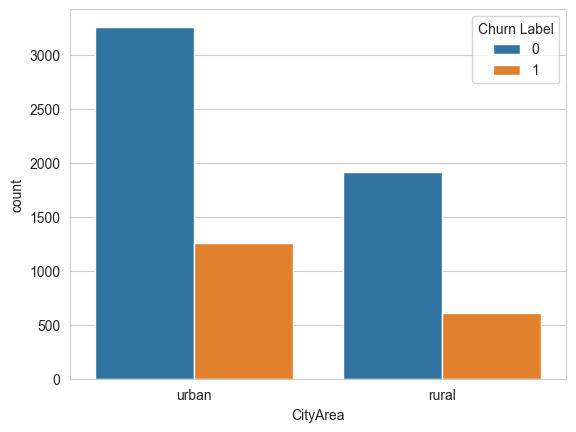

In [49]:
telecom_func(telco_final_df,'CityArea')

## 13. Zip Code

Quantidade de valores unicos:   1626

Quais sao os valores unicos:  [90022 90063 90065 ... 91934 92105 92250]

Quantidade de valores nulos:  0

Quantidade por opção (ordenada):
Zip Code
90001    4
90002    4
90003    5
90004    5
90005    4
        ..
96143    4
96145    3
96146    4
96148    4
96150    2
Name: count, Length: 1626, dtype: int64


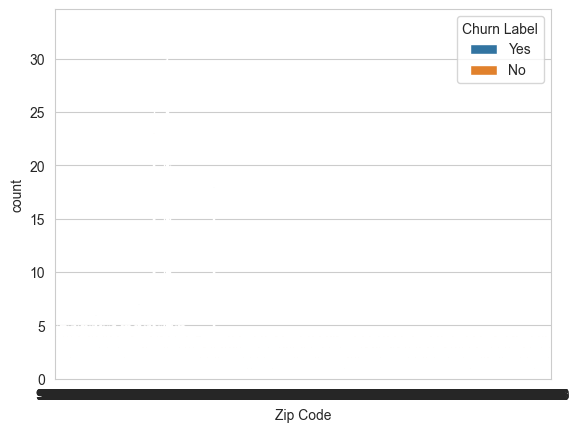

In [50]:
telecom_func(telco_df,'Zip Code')  

In [68]:
telco_final_df['Zip Code'] = telco_df['Zip Code']

In [69]:
telco_final_df

,Churn Label,Gender,AgeGroup,Under 30,Senior Citizen,Married,Dependents,Nr of Dependents,City,CityArea,Zip Code
0,1,0,6.0,0,1,0,0,0,Los Angeles,urban,90022
1,1,1,6.0,0,1,1,1,1,Los Angeles,urban,90063
2,1,0,5.0,0,1,0,1,3,Los Angeles,urban,90065
3,1,1,6.0,0,1,1,1,1,Inglewood,urban,90303
4,1,1,6.0,0,1,1,1,1,Whittier,urban,90602
...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1.0,0,0,0,0,0,Landers,rural,92285
7039,0,0,2.0,0,0,1,1,2,Adelanto,urban,92301
7040,0,1,1.0,0,0,1,1,2,Amboy,rural,92304
7041,0,1,2.0,0,0,1,1,2,Angelus Oaks,rural,92305


### Relacao entre cidades, zip code e churn label?

In [51]:
#contingency_table = pd.crosstab(telco_df['City'], telco_df['Zip Code'])
#print(contingency_table.head(50))
#usar tabela de contingencia nao foi muito util, nao esta facil de ver porque ha muitas categorias


### Relacao entre mapa (latitude+langitude), zip code e churn label

In [71]:
telco_final_df

,Churn Label,Gender,AgeGroup,Under 30,Senior Citizen,Married,Dependents,Nr of Dependents,City,CityArea,Zip Code
0,1,0,6.0,0,1,0,0,0,Los Angeles,urban,90022
1,1,1,6.0,0,1,1,1,1,Los Angeles,urban,90063
2,1,0,5.0,0,1,0,1,3,Los Angeles,urban,90065
3,1,1,6.0,0,1,1,1,1,Inglewood,urban,90303
4,1,1,6.0,0,1,1,1,1,Whittier,urban,90602
...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1.0,0,0,0,0,0,Landers,rural,92285
7039,0,0,2.0,0,0,1,1,2,Adelanto,urban,92301
7040,0,1,1.0,0,0,1,1,2,Amboy,rural,92304
7041,0,1,2.0,0,0,1,1,2,Angelus Oaks,rural,92305


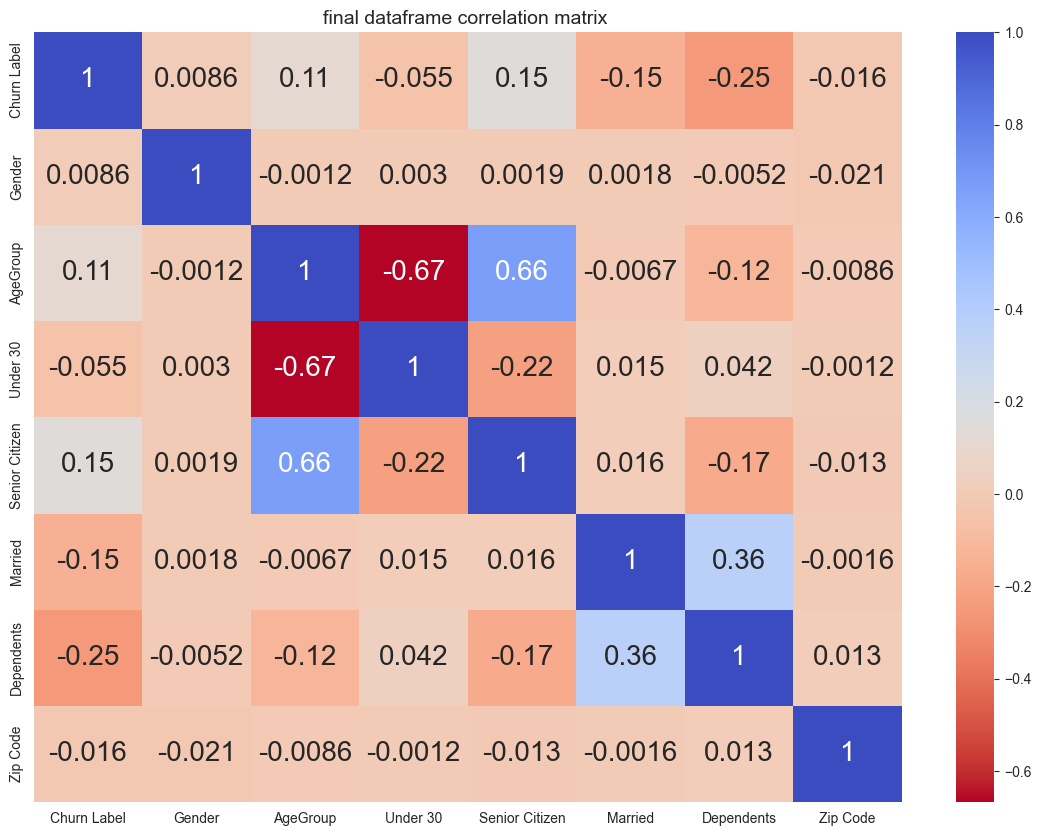

In [73]:
f, ax1 = plt.subplots(1, 1, figsize=(14,10))
                                             
# Entire DataFrame 
#corr = telco_final_df.corr()
corr = telco_final_df.select_dtypes(include=[float, int]).corr()

sns.heatmap(corr, annot=True, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("final dataframe correlation matrix ", fontsize=14)
                                             
plt.show()

In [78]:
'''import folium
from folium.plugins import MarkerCluster

# Centralizar o mapa na localização média dos dados
latitude_center = telco_final_df['Latitude'].mean()
longitude_center = telco_final_df['Longitude'].mean()
mapa = folium.Map(location=[latitude_center, longitude_center], zoom_start=10)

# Adicionar cluster de marcadores no mapa
marker_cluster = MarkerCluster().add_to(mapa)

# Loop para adicionar cada ponto no mapa
for idx, row in telco_final_df.iterrows():
    # Define cor com base no Churn Label
    color = 'red' if row['Churn Label'] == 1 else 'blue'
    
    # Adiciona um marcador com pop-up de Zip Code e Churn Label
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Zip Code: {row['Zip Code']}, Churn: {row['Churn Label']}",
        icon=folium.Icon(color=color)
    ).add_to(marker_cluster)

mapa'''


'import folium\nfrom folium.plugins import MarkerCluster\n\n# Centralizar o mapa na localização média dos dados\nlatitude_center = telco_final_df[\'Latitude\'].mean()\nlongitude_center = telco_final_df[\'Longitude\'].mean()\nmapa = folium.Map(location=[latitude_center, longitude_center], zoom_start=10)\n\n# Adicionar cluster de marcadores no mapa\nmarker_cluster = MarkerCluster().add_to(mapa)\n\n# Loop para adicionar cada ponto no mapa\nfor idx, row in telco_final_df.iterrows():\n    # Define cor com base no Churn Label\n    color = \'red\' if row[\'Churn Label\'] == 1 else \'blue\'\n    \n    # Adiciona um marcador com pop-up de Zip Code e Churn Label\n    folium.Marker(\n        location=[row[\'Latitude\'], row[\'Longitude\']],\n        popup=f"Zip Code: {row[\'Zip Code\']}, Churn: {row[\'Churn Label\']}",\n        icon=folium.Icon(color=color)\n    ).add_to(marker_cluster)\n\nmapa'

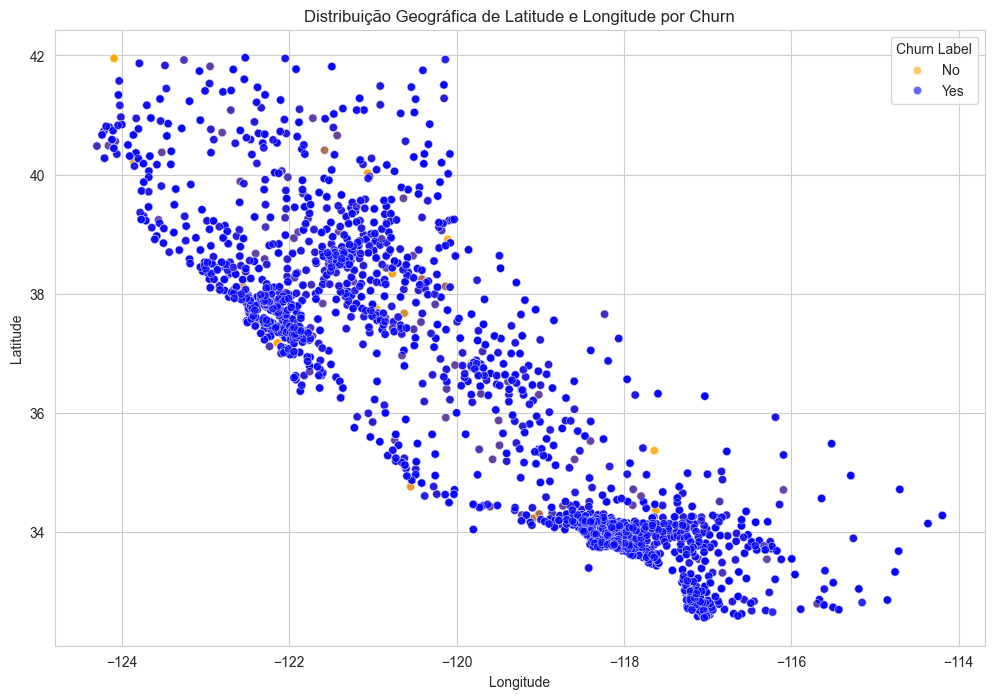

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o gráfico
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Longitude',
    y='Latitude',
    hue='Churn Label',  # Cores diferentes para churn = 1 e churn = 0
    data=telco_final_df,
    palette={0: 'blue', 1: 'orange'},
    alpha=0.6
)
plt.title("Distribuição Geográfica de Latitude e Longitude por Churn")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Churn Label", labels=["No", "Yes"])

#Nao e boa ideia colocar zip, porque minha pouco visivel
#for _, row in telco_final_df.iterrows():
#    plt.text(row['Longitude'], row['Latitude'], row['Zip Code'], 
#             fontsize=8, ha='right', color='black', alpha=0.7)


plt.show()

In [52]:
#seria muito util em outro cenario, aqui ja que o zip code e como se fosse um ID e nao um valor(que quanto maior, mais significa algo) acaba nao sendo util
#usa essa funcao em outra variavel pra visualizacao

# gráfico de barras mostrando o número de códigos postais por cidade
#city_zip_summary = telco_df['City'].value_counts().reset_index()
#city_zip_summary.columns = ['City', 'Count']

# Limitar o número de cidades para visualização
#top_cities = city_zip_summary.head(20)

#plt.figure(figsize=(12, 6))
#sns.barplot(x='Count', y='City', data=top_cities, palette='viridis')
#plt.title('Top 20 Cities by Count')
#plt.xlabel('Count')
#plt.ylabel('City')
#plt.show()

In [53]:
# Agrupar por cidade 
city_stats = telco_df.groupby('City').agg({
    'Zip Code': 'nunique',  # número de códigos postais únicos por cidade
}).reset_index()

#Exibir as primeiras linhas
#print(city_stats)
#print(city_stats.to_string(index=False))

In [54]:
telco_final_df  

,Churn Label,Gender,AgeGroup,Under 30,Senior Citizen,Married,Dependents,Nr of Dependents,City,CityArea
0,1,0,71-80,0,1,0,0,0,Los Angeles,urban
1,1,1,71-80,0,1,1,1,1,Los Angeles,urban
2,1,0,61-71,0,1,0,1,3,Los Angeles,urban
3,1,1,71-80,0,1,1,1,1,Inglewood,urban
4,1,1,71-80,0,1,1,1,1,Whittier,urban
...,...,...,...,...,...,...,...,...,...,...
7038,0,1,21-31,0,0,0,0,0,Landers,rural
7039,0,0,31-41,0,0,1,1,2,Adelanto,urban
7040,0,1,21-31,0,0,1,1,2,Amboy,rural
7041,0,1,31-41,0,0,1,1,2,Angelus Oaks,rural


## 14. Latitude

Quantidade de valores unicos:   1626

Quais sao os valores unicos:  [34.02381  34.044271 34.108833 ... 32.649787 32.741859 32.811001]

Quantidade de valores nulos:  0

Quantidade por opção (ordenada):
Latitude
32.555828    5
32.578103    4
32.579134    4
32.587557    5
32.605012    4
            ..
41.924174    3
41.932207    3
41.949216    4
41.950683    4
41.962127    4
Name: count, Length: 1626, dtype: int64


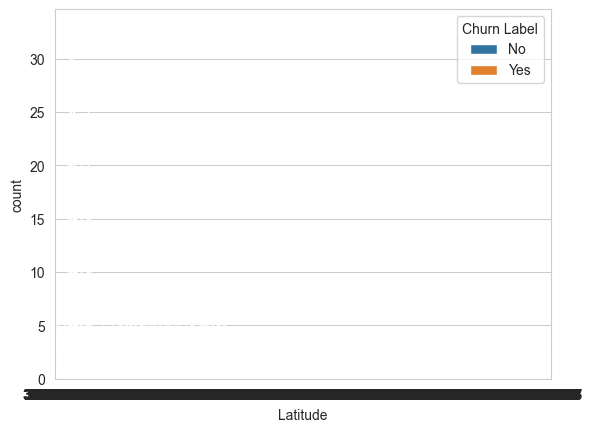

In [55]:
telecom_func(telco_df,'Latitude')  

In [76]:
telco_final_df['Latitude'] = telco_df['Latitude']

## 15. Longitude 

Quantidade de valores unicos:   1625

Quais sao os valores unicos:  [-118.156582 -118.185237 -118.229715 ... -116.2237   -117.090353
 -115.152865]

Quantidade de valores nulos:  0

Quantidade por opção (ordenada):
Longitude
-124.301372    4
-124.240051    4
-124.217378    4
-124.210902    4
-124.189977    4
              ..
-114.758334    5
-114.716120    4
-114.702256    4
-114.365140    5
-114.192901    4
Name: count, Length: 1625, dtype: int64


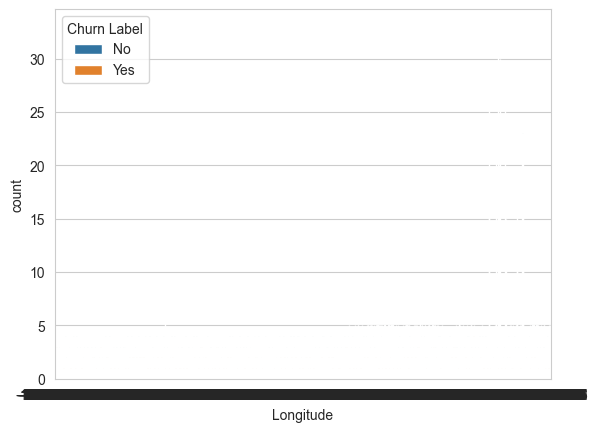

In [56]:
telecom_func(telco_df,'Longitude')  

In [75]:
telco_final_df['Longitude'] = telco_df['Longitude']

## 16. Population

Quantidade de valores unicos:   1569

Quais sao os valores unicos:  [68701 55668 47534 ...   116 73006  8062]

Quantidade de valores nulos:  0

Quantidade por opção (ordenada):
Population
11        5
19        4
21        9
23        3
25        4
         ..
97318     5
98239     5
101215    5
103214    5
105285    5
Name: count, Length: 1569, dtype: int64


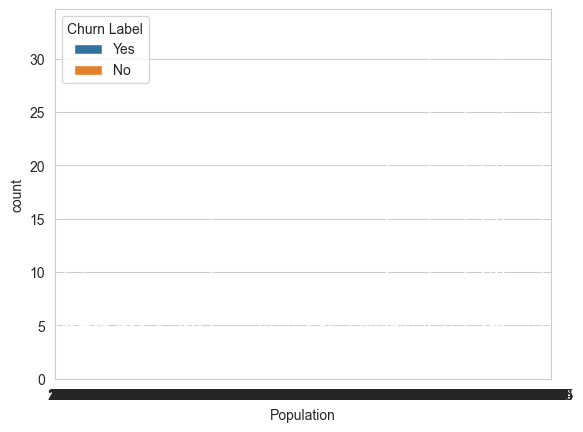

In [59]:
telecom_func(telco_df,'Population')  

## 17. Quarter

Quantidade de valores unicos:   1

Quais sao os valores unicos:  ['Q3']

Quantidade de valores nulos:  0

Quantidade por opção:
Quarter
Q3    7043
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_6320\3787506364.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


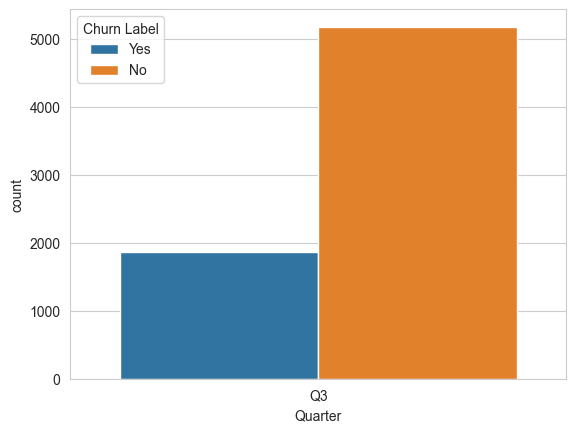

In [60]:
telecom_func(telco_df,'Quarter')  

Quarter e irrelevante porque so tem 1 categoria

## 18. Referred a Friend

Quantidade de valores unicos:   2

Quais sao os valores unicos:  ['No' 'Yes']

Quantidade de valores nulos:  0

Quantidade por opção:
Referred a Friend
No     3821
Yes    3222
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_6320\3787506364.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


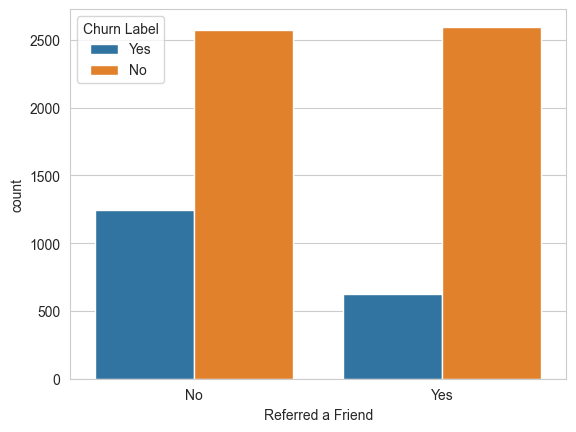

In [61]:
telecom_func(telco_df,'Referred a Friend')  

## 19. Number of Referrals

Quantidade de valores unicos:   12

Quais sao os valores unicos:  [ 0  1  6  2  4  3  7  5  8  9 10 11]

Quantidade de valores nulos:  0

Quantidade por opção (ordenada):
Number of Referrals
0     3821
1     1086
2      236
3      255
4      236
5      264
6      221
7      248
8      213
9      238
10     223
11       2
Name: count, dtype: int64


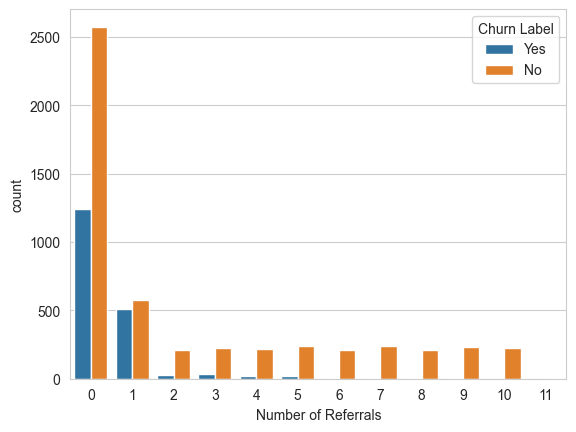

In [62]:
telecom_func(telco_df,'Number of Referrals')  

## 20. Tenure in Months

Quantidade de valores unicos:   72

Quais sao os valores unicos:  [ 1  8 18 25 37 27 58 15  7 11  3 13 16 24  4 32 54  2 21 55  5 20 65 49
 43 56 52 33 30 46  9 10 35 44 62 14 12 17 39 68 34 22 19 23 42 41 57 38
 29 66 69 40 31 59 36 45 53 70 47 50 51 72 26  6 28 48 61 71 60 64 67 63]

Quantidade de valores nulos:  0

Quantidade por opção (ordenada):
Tenure in Months
1     613
2     238
3     200
4     176
5     133
     ... 
68    100
69     95
70    119
71    170
72    362
Name: count, Length: 72, dtype: int64


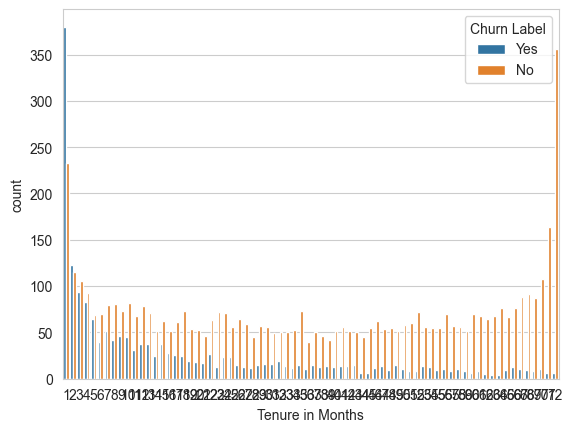

In [63]:
#mandato em meses
telecom_func(telco_df,'Tenure in Months')  

## 21. Offer

Quantidade de valores unicos:   5

Quais sao os valores unicos:  [nan 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']

Quantidade de valores nulos:  3877

Quantidade por opção:
Offer
NaN        3877
Offer B     824
Offer E     805
Offer D     602
Offer A     520
Offer C     415
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_6320\3787506364.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


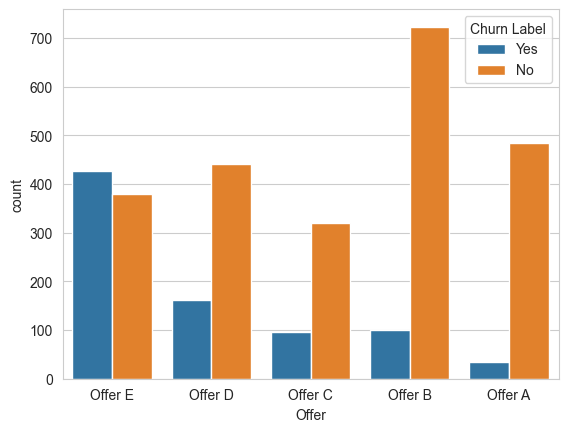

In [64]:
telecom_func(telco_df,'Offer')  

## 22. Phone Service

Quantidade de valores unicos:   2

Quais sao os valores unicos:  ['No' 'Yes']

Quantidade de valores nulos:  0

Quantidade por opção:
Phone Service
Yes    6361
No      682
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_6320\3787506364.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


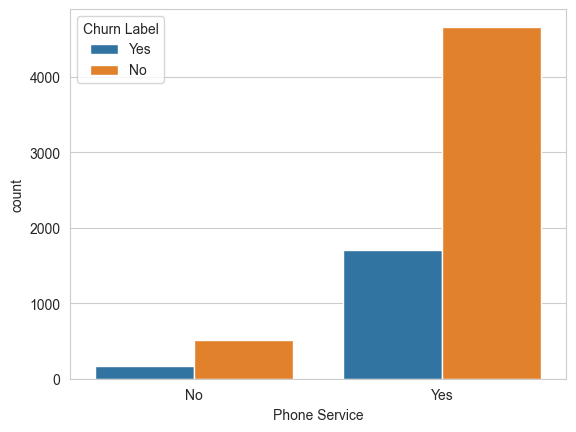

In [65]:
telecom_func(telco_df,'Phone Service')  

## 23. Avg Monthly Long Distance Charges

Quantidade de valores unicos:   3584

Quais sao os valores unicos:  [ 0.   48.85 11.33 ... 44.99 44.98  8.62]

Quantidade de valores nulos:  0

Quantidade por opção (ordenada):
Avg Monthly Long Distance Charges
0.00     682
1.01       1
1.02       3
1.03       1
1.05       1
        ... 
49.94      1
49.95      2
49.96      2
49.98      3
49.99      1
Name: count, Length: 3584, dtype: int64


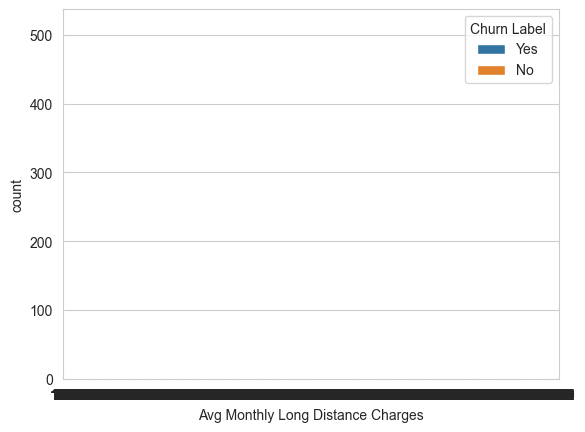

In [66]:
telecom_func(telco_df,'Avg Monthly Long Distance Charges')  

## 24. Multiple Lines

Quantidade de valores unicos:   2

Quais sao os valores unicos:  ['No' 'Yes']

Quantidade de valores nulos:  0

Quantidade por opção:
Multiple Lines
No     4072
Yes    2971
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_6320\3787506364.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


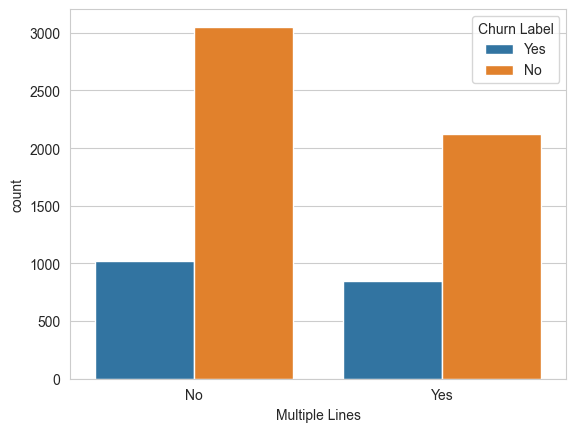

In [67]:
telecom_func(telco_df,'Multiple Lines')  

Irrelevant data: Customer ID, under 30 (me parece irrelevante), Country, State

Categorical: Churn Label, Gender

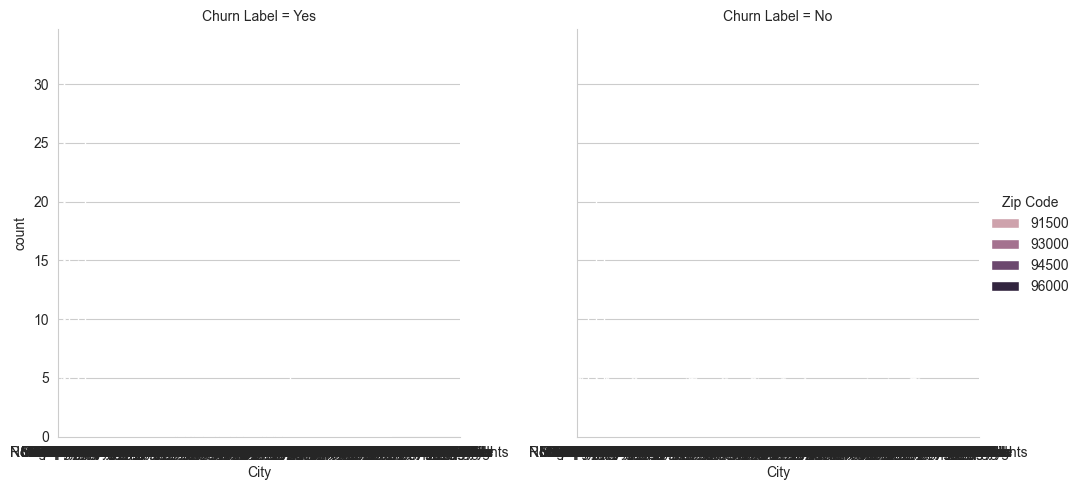

In [57]:
#ideia visualizacao
# Gráfico de barras empilhadas para Sex, Marital Status e fraudfound  
sns.catplot(x='City', hue='Zip Code', col='Churn Label', kind='count', data=telco_df)
plt.show()

## Codificacao

In [58]:
#ordinal encoding
encoder = OrdinalEncoder(categories=[['19-21','21-31','31-41','41-51','51-61','61-71','71-80']])
telco_final_df['AgeGroup'] = encoder.fit_transform(telco_final_df[['AgeGroup']]) 

In [ ]:
#contingency_table = pd.crosstab(telco_df['City'], telco_df['Zip Code'])
#print(contingency_table.head(50))
#usar tabela de contingencia nao foi muito util, nao esta facil de ver porque ha muitas categorias